## PROBLEM STATEMENT
A retail company into the distribution of goods under 3 categories worldwide decides to embark on a campaign called Operation  Increase Sales and Profit' (OISP) which is focused on increasing sales and maximising profit. In order to ensure they make the business decision for their company, they would this data which has been gathered from their company over a 4 year period to be analyzed in order to draw out insights.

As data analysts who have been contracted to work on this project. We intend to use the data given to answer these questions that will help in our analysis and recommendations.
- What markets are generating high sales?
- What markets are generating high profits?
- What are the 5 countries generatng high sales?
- What are the 5 countries generatng high profits?
- What are the top 5 profit generating products?
- What are the least 5 profit generating products?
- Which product category had the most sales and profit?
- what is the most used shipping mode?
- What is the relationship between sales and profit?
- What are the sales and profit trend over the years?


# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# IMPORTING FILES

In [2]:
data = pd.read_csv("superstore.csv",encoding = "ISO-8859-1")

## MAKING COPY OF FILE

In [3]:
copy_superstore = data.copy()

In [4]:
copy_superstore

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [5]:
copy_superstore.to_csv("copy_superstore.csv")

## DISPLAYING THE SHAPE OF THE DATA

In [6]:
data.shape

(51290, 24)

## GETTING INFORMATION ABOUT COLUMNS

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

## DISPLAYING FIRST AND LAST ROWS

In [8]:
data.head(30)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.00,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.10,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.00,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.50,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.10,37.7700,4.70,Medium
5,22254,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.10,15.3420,1.80,Medium
6,21613,IN-2011-30733,1/2/2011,3/2/2011,Second Class,PO-18865,Patrick O'Donnell,Consumer,Dhaka,Dhaka,...,TEC-CO-10002316,Technology,Copiers,"Brother Personal Copier, Laser",285.780,2,0.00,71.4000,57.30,Critical
7,34662,CA-2011-115161,1/2/2011,3/2/2011,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,...,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,3.4196,54.64,High
8,44508,AO-2011-1390,1/2/2011,4/2/2011,Second Class,DK-3150,David Kendrick,Corporate,Luanda,Luanda,...,OFF-FEL-10001541,Office Supplies,Storage,"Fellowes Lockers, Wire Frame",206.400,1,0.00,92.8800,53.08,Critical
9,23688,ID-2011-56493,1/2/2011,3/2/2011,Second Class,SP-20650,Stephanie Phelps,Corporate,Yingcheng,Hubei,...,OFF-ST-10002161,Office Supplies,Storage,"Tenex Trays, Single Width",162.720,3,0.00,68.3100,44.36,Critical


In [9]:
#DISPLAYING LAST ROWS
data.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


## CHANGING THE DATA TYPE OF SOME COLUMNS

In [10]:
data= data.astype({"City":"category","State":"category","Country":"category","Region":"category","Sub-Category":"category"})

In [11]:
#confirming change
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Row ID          51290 non-null  int64   
 1   Order ID        51290 non-null  object  
 2   Order Date      51290 non-null  object  
 3   Ship Date       51290 non-null  object  
 4   Ship Mode       51290 non-null  object  
 5   Customer ID     51290 non-null  object  
 6   Customer Name   51290 non-null  object  
 7   Segment         51290 non-null  object  
 8   City            51290 non-null  category
 9   State           51290 non-null  category
 10  Country         51290 non-null  category
 11  Postal Code     9994 non-null   float64 
 12  Market          51290 non-null  object  
 13  Region          51290 non-null  category
 14  Product ID      51290 non-null  object  
 15  Category        51290 non-null  object  
 16  Sub-Category    51290 non-null  category
 17  Product Name

## CHECKING DUPLICATES

In [12]:
data[data.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


## DISTIBUTIONS

### DISTRIBUTION OF THE SALES DATA

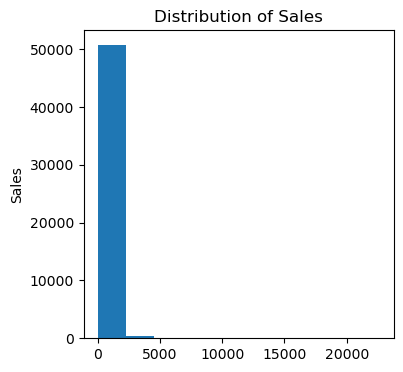

In [13]:
#DISPLAYING THE DISTRIBUTION OF SALES FROM THE DATA

plt.figure(figsize=(4,4))
plt.hist(x=data["Sales"])
plt.title("Distribution of Sales")
plt.ylabel('Sales')
plt.show()

In [14]:
#there are outliers,we check this by using percentile

In [15]:
#FINDING THE LOWER AND UPPER BOUNDS FOR SALES

q1, q3= np.percentile(data['Sales'],[25,75])
iqr = q3 - q1

low_bound= q1 - (iqr * 1.5)
print(f' lower bound = {low_bound}')

upper_bound= q3 + (iqr * 1.5)
print(f' Upper bound = {upper_bound}')

 lower bound = -299.6832375
 Upper bound = 581.4950625


In [16]:
#COUNTING THE NUMBER OF SALES 
data.query('Sales <= -299').count()[0]
# there are no outliers below the lower boundary

0

In [17]:
# there are 5658 outliers in the sales column
data.query('Sales >= 581').count()[0]

5658

In [18]:
# there are 5658 outliers in the sales data however we will be maintaining this values because they are relevant our analysis and dropping them would mean deleting the high sales made.

### DISTRIBUTION OF THE PROFIT DATA

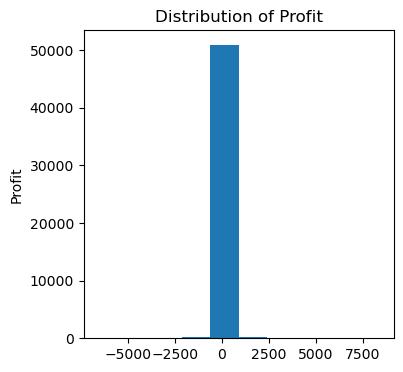

In [19]:
plt.figure(figsize=(4,4))
plt.hist(x=data["Profit"])
plt.title("Distribution of Profit")
plt.ylabel('Profit')
plt.show()

In [20]:
#CALCULATING THE LOWER AND UPPER BOUNDS
q1, q3= np.percentile(data['Profit'],[25,75])
iqr = q3 - q1

low_bound= q1 - (iqr * 1.5)
print(f' lower bound = {low_bound}')

upper_bound= q3 + (iqr * 1.5)
print(f' Upper bound = {upper_bound}')

 lower bound = -55.215
 Upper bound = 92.025


In [21]:
#CHECKING FOR OUTLIERS BELOW THE LOWER BOUND
data.query('Profit >= -55').count()[0]
# there are 47,754 outliers below the lower boundary

47754

In [22]:
##CHECKING FOR OUTLIERS ABOVE THE UPPER BOUND
data.query('Profit <= -92').count()[0]
#there are 2,379 outliers above the upper boundary

2379

In [23]:
## there are 47,754 outliers below the lower bound and 2,379 above the upper quartile in the profit data however we will be maintaining this values because they are relevant our analysis and dropping them would mean deleting the profits made.

### DISTRIBUTION OF THE DISCOUNT DATA

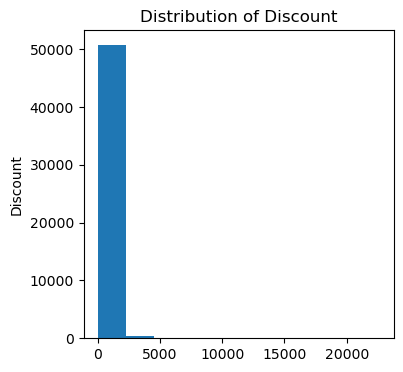

In [24]:
plt.figure(figsize=(4,4))
plt.hist(x=data["Sales"])
plt.title("Distribution of Discount")
plt.ylabel('Discount')
plt.show()

In [25]:
#CALCULATING THE LOWER AND UPPER BOUNDS
q1, q3= np.percentile(data['Discount'],[25,75])
iqr = q3 - q1

low_bound= q1 - (iqr * 1.5)
print(f' lower bound = {low_bound}')

upper_bound= q3 + (iqr * 1.5)
print(f' Upper bound = {upper_bound}')

 lower bound = -0.30000000000000004
 Upper bound = 0.5


In [26]:
#CHECKING FOR THE VALUES BELOW THE LOWER BOUND
data.query('Profit >= -0.3').count()[0]
#there are 39,005 outliers below the lower bound

39005

In [27]:
#CHECKING FOR THE VALUES ABOVE THE UPPER BOUND
data.query('Profit <= 0.5').count()[0]
#there are 13,695 outliers above the upper quartile

13695

In [28]:
## there are 39,005 outliers below the lower bound and 13,695 above the upper quartile in the discount data however we will be maintaining this values because they are relevant our analysis and dropping them would mean deleting the discounts we have offered to our customers.

### DISTRIBUTION OF COLUMNS

THIS ANALYSIS WILL HELP US TO SEE HOW THE VALUES IN EACH COLUMN ARE ARRANGED OR SPREAD OUT.

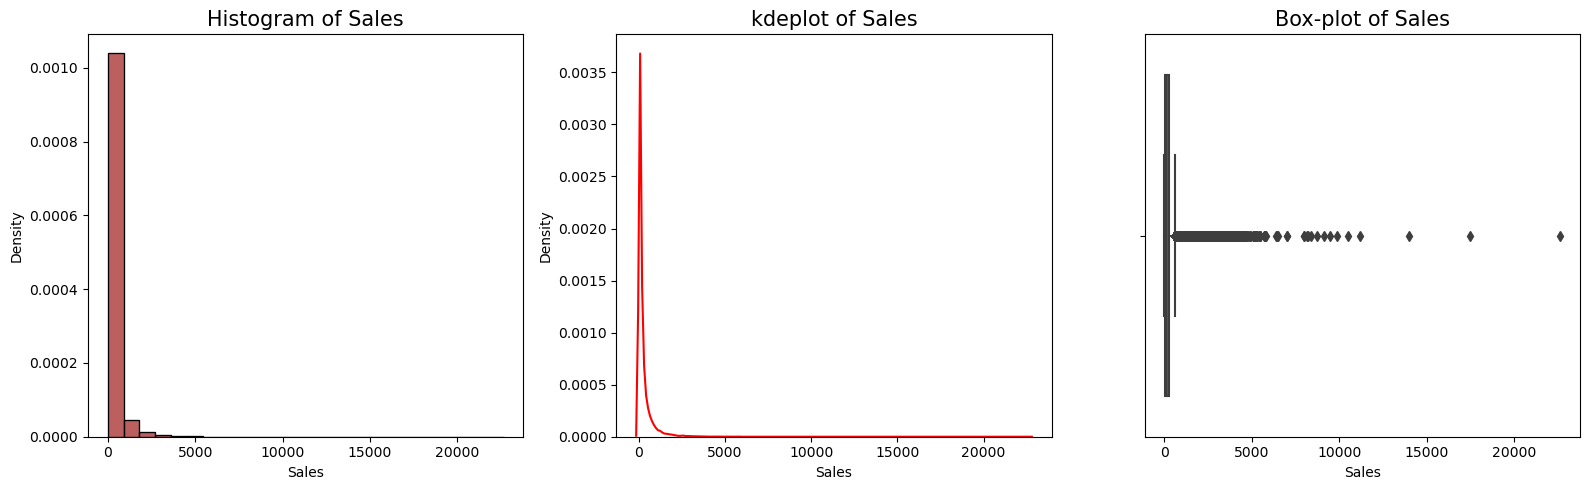

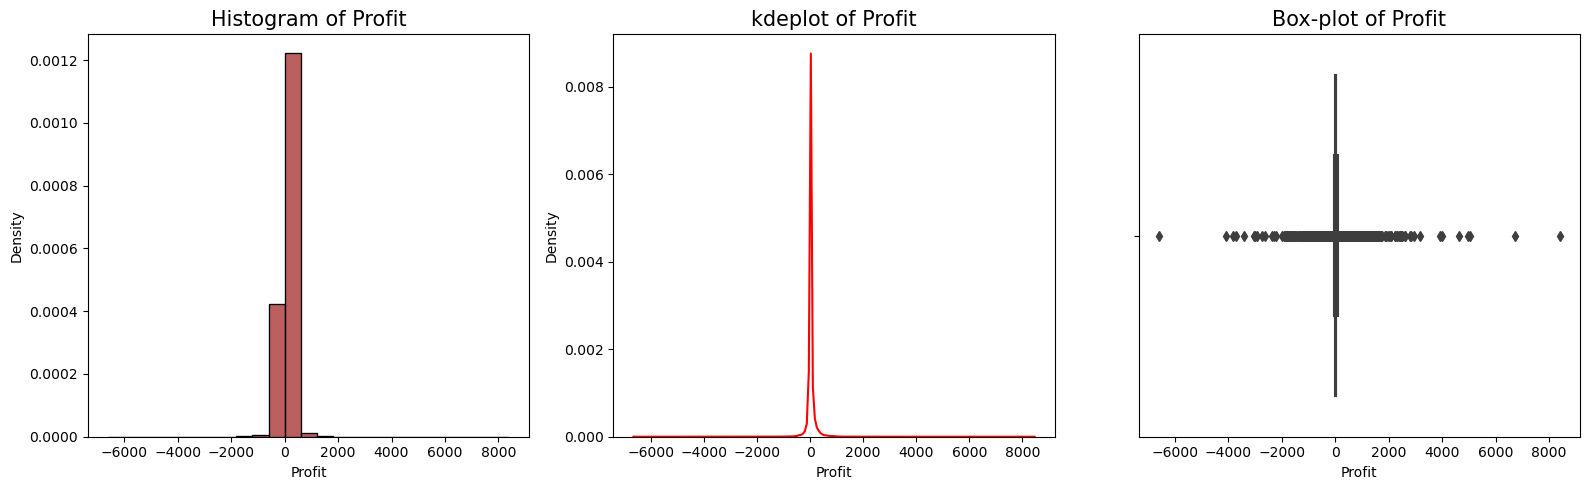

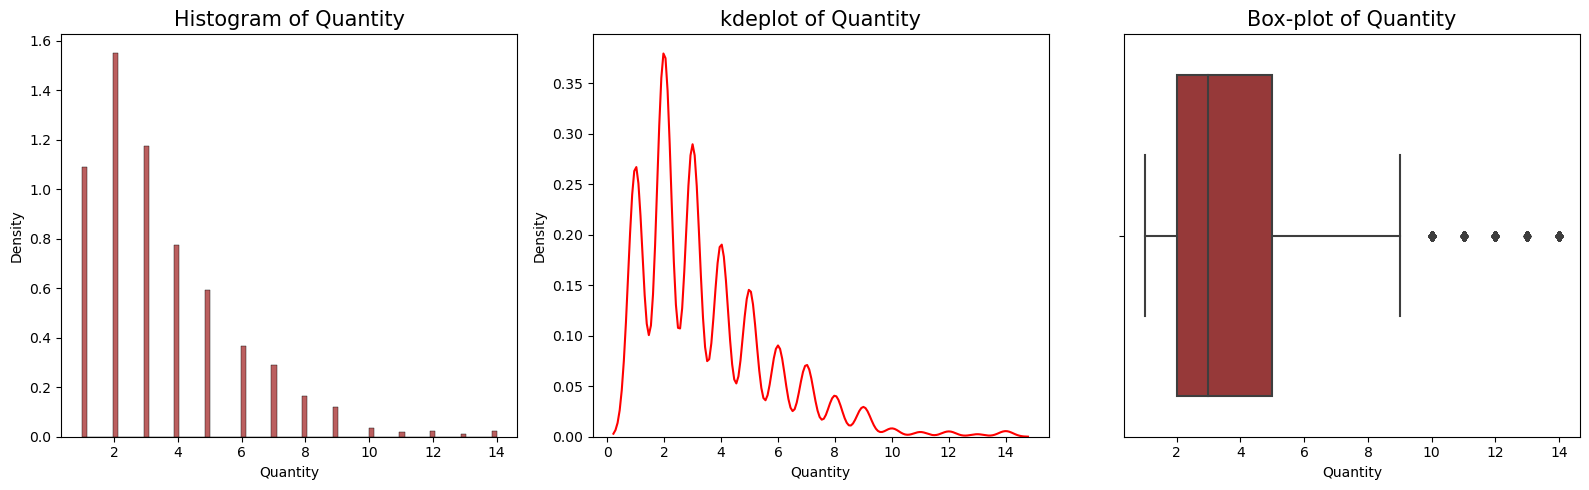

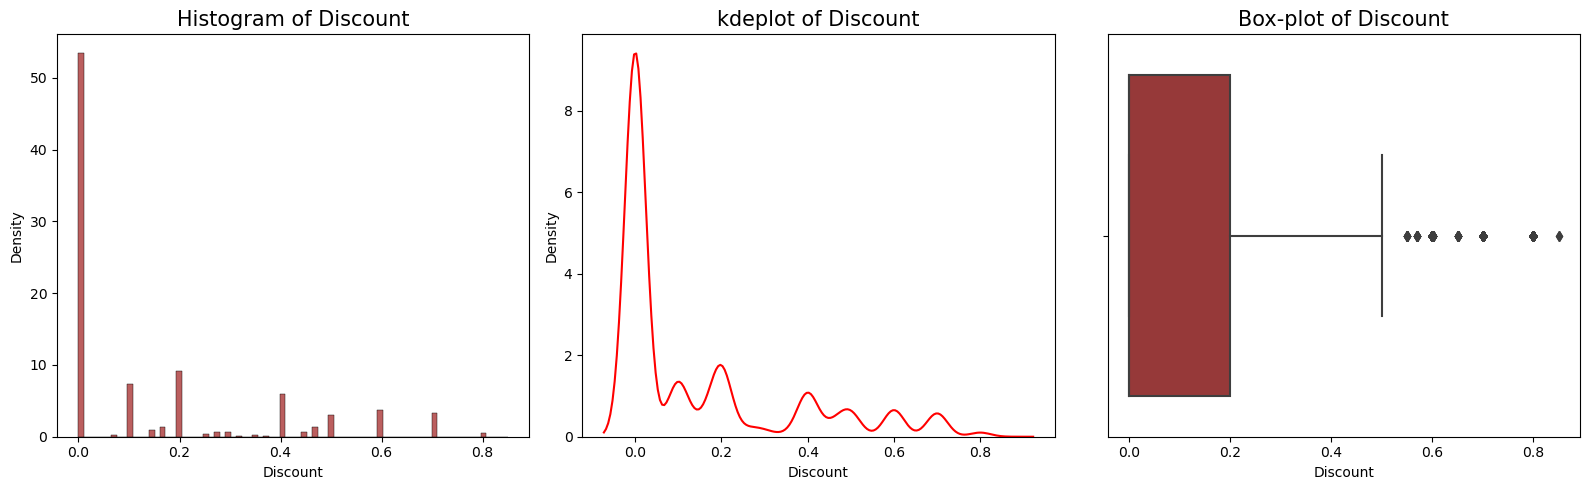

In [29]:
imp_numerical_cols= data[['Sales','Profit','Quantity','Discount']]
for i,col in enumerate(imp_numerical_cols):
    plt.figure(figsize=(16,5))
    bins='auto'
    if i in [0,1]:
        bins=25
    plt.subplot(1,3,1)
    sns.histplot(data = data,x=col,stat='density',bins=bins,color='Brown')
    plt.title(f'Histogram of {col}',size=15)
    
    plt.subplot(1,3,2)
    sns.kdeplot(data = data,x=col,color='red')
    plt.title(f'kdeplot of {col}',size=15)
    
    plt.subplot(1,3,3)
    sns.boxplot(data = data,x=col,color='brown')
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

### INSIGHTS FROM THE DISTRIBUTION OF COLUMNS

- From the visuals,sales,quantity are right skewed with outliers, however they will be maintained as they are essential to our analysis. The profit is normal skewed.

# DISPLAYING ITEMS IN COLUMNS FROM THE DATA

### DISPLAYING THE COLUMNS NEEDED FOR ANALYSIS

In [30]:
analysis = data[["City","State","Country","Sub-Category","Product Name","Sales","Quantity","Discount","Profit","Shipping Cost"]]

## DISPLAYING ITEMS IN MARKET COLUMN

In [31]:
data["Market"]

0        Africa
1          APAC
2          EMEA
3            EU
4          APAC
          ...  
51285        US
51286    Africa
51287     LATAM
51288     LATAM
51289        US
Name: Market, Length: 51290, dtype: object

## DISPLAYING ITEMS IN REGION COLUMN

In [32]:
data["Region"]

0         Africa
1        Oceania
2           EMEA
3          North
4        Oceania
          ...   
51285       West
51286     Africa
51287    Central
51288      North
51289       West
Name: Region, Length: 51290, dtype: category
Categories (13, object): ['Africa', 'Canada', 'Caribbean', 'Central', ..., 'Oceania', 'South', 'Southeast Asia', 'West']

## DISPLAYING VALUE COUNTS OF CITIES IN THE CITY COLUMN

In [33]:
analysis["City"].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Santo Domingo      443
                  ... 
Chapel Allerton      1
Changzhi             1
Changde              1
Champaign            1
Moulins              1
Name: City, Length: 3636, dtype: int64

## DISPLAYING VALUE COUNT OF STATE IN THE STATE COLUMN

In [34]:
analysis["State"].value_counts()

California       2001
England          1499
New York         1128
Texas             985
Ile-de-France     981
                 ... 
Kastamonu           1
Newfoundland        1
Novgorod            1
Novosibirsk         1
Sikasso             1
Name: State, Length: 1094, dtype: int64

## DISPLAYING VALUE COUNT OF PRODUCTS IN PRODUCT COLUMN

In [35]:
analysis["Product Name"].value_counts()

Staples                                                                      227
Cardinal Index Tab, Clear                                                     92
Eldon File Cart, Single Width                                                 90
Rogers File Cart, Single Width                                                84
Ibico Index Tab, Clear                                                        83
                                                                            ... 
Okidata B401 Printer                                                           1
Snap-A-Way Black Print Carbonless Speed Message, No Reply Area, Duplicate      1
Xerox WorkCentre 6505DN Laser Multifunction Printer                            1
Barricks Round Table, Rectangular                                              1
Multimedia Mailers                                                             1
Name: Product Name, Length: 3788, dtype: int64

## DISPLAYING UNIQUE ITEMS IN PRODUCT NAME COLUMN

In [36]:
#RENAMING THE COLUMN NAME
data.rename({"Product Name":"Product_name"},axis=1, inplace=True)

In [37]:
data.Product_name.unique()

array(['Tenex Lockers, Blue', 'Acme Trimmer, High Speed',
       'Tenex Box, Single Width', ...,
       'Park Ridge Embossed Executive Business Envelopes',
       'Acco Glide Clips', 'Multimedia Mailers'], dtype=object)

### DISPLAYING EVERYTHING IN THE COUNTRY COLUMN 

In [38]:
data.Country.unique()

['Algeria', 'Australia', 'Hungary', 'Sweden', 'Bangladesh', ..., 'Swaziland', 'Estonia', 'South Sudan', 'Bahrain', 'Macedonia']
Length: 147
Categories (147, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

## DISPLAYING SUMMARY STATISTICS OF THE DATA

In [39]:
#STATISTICAL INFORMATION ABOUT THE DATA
analysis.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915
std,487.565361,2.278766,0.212280,174.340972,57.296804
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


## DISPLAYING SUMMARY OF THE NON NUMERICAL COLUMNS

In [40]:
data.describe(include = np.object)

C:\Users\EDNA\AppData\Local\Temp\ipykernel_13372\2743208382.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include = np.object)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Market,Product ID,Category,Product_name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,1430,1464,4,1590,795,3,7,10292,3,3788,4
top,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,APAC,OFF-AR-10003651,Office Supplies,Staples,Medium
freq,14,135,130,30775,97,108,26518,11002,35,31273,227,29433


# ANALYZING EVERYTHING SALES IN THE DATA

### A CHART OF SALES AGAINST MARKET

In [41]:
#CALCULATING THE TOTAL OF SALES AND GROUPING BY MARKET
total_sales_market = data.groupby("Market")["Sales"].sum()

In [42]:
#TOTAL SALES PER MAEKET
total_sales_market 

Market
APAC      3.585744e+06
Africa    7.837732e+05
Canada    6.692817e+04
EMEA      8.061613e+05
EU        2.938089e+06
LATAM     2.164605e+06
US        2.297201e+06
Name: Sales, dtype: float64

In [43]:
#CREATING A FRAME FOR THE TOTAL SALES DISPLAY
total_sales_market = total_sales_market.to_frame()

In [44]:
total_sales_market

,Sales
Market,
APAC,3.585744e+06
Africa,7.837732e+05
Canada,6.692817e+04
EMEA,8.061613e+05
EU,2.938089e+06
LATAM,2.164605e+06
US,2.297201e+06


In [45]:
#SORTING THE  SALES PER MARKET IN ASCENDING
total_sales_market.sort_values(by="Sales",inplace =True)

In [46]:
total_sales_market

,Sales
Market,
Canada,6.692817e+04
Africa,7.837732e+05
EMEA,8.061613e+05
LATAM,2.164605e+06
US,2.297201e+06
EU,2.938089e+06
APAC,3.585744e+06


In [47]:
#CALLING OUT THE MARKETS
total_sales_market.index

Index(['Canada', 'Africa', 'EMEA', 'LATAM', 'US', 'EU', 'APAC'], dtype='object', name='Market')

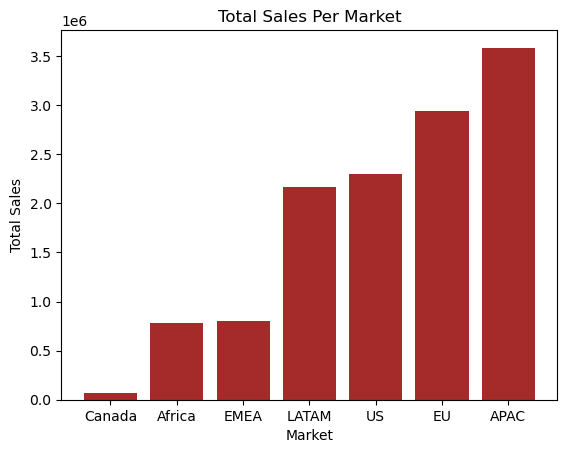

In [48]:
plt.bar(total_sales_market.index, total_sales_market["Sales"],color=["brown"])
plt.title("Total Sales Per Market")
plt.xlabel("Market")
plt.ylabel("Total Sales")
plt.show()

### DISPLAYING THE TOP 5 COUNTIES WITH HIGHEST AND LOWEST SALES

In [49]:
#CALCULATING THE TOTAL OF SALES AND GROUPING BY COUNTRY
max_sales_country = data.groupby("Country")["Sales"].sum()

In [50]:
max_sales_country

Country
Afghanistan    21673.32000
Albania         3888.12000
Algeria        36091.59000
Angola         25554.00000
Argentina      57511.78328
                  ...     
Venezuela      26587.82956
Vietnam        65800.19940
Yemen           2465.71200
Zambia         26035.50000
Zimbabwe        3765.10500
Name: Sales, Length: 147, dtype: float64

In [51]:
#CREATING A FRAME
max_sales_country = max_sales_country.to_frame()

In [52]:
max_sales_country

,Sales
Country,
Afghanistan,21673.32000
Albania,3888.12000
Algeria,36091.59000
Angola,25554.00000
Argentina,57511.78328
...,...
Venezuela,26587.82956
Vietnam,65800.19940
Yemen,2465.71200


In [53]:
#BRINGING OUT THE TOP 5 COUNTRIES WITH HIGH SALES AND SORTING THEM
max_sales_country = max_sales_country.sort_values(by = "Sales", ascending=False).head()

In [54]:
max_sales_country

,Sales
Country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05


In [55]:
max_sales_country.index

CategoricalIndex(['United States', 'Australia', 'France', 'China', 'Germany'], categories=['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', ...], ordered=False, dtype='category', name='Country')

In [56]:
#COUNTRIES WITH LEAST SALES
min_sales_country = data.groupby("Country")["Sales"].sum()

In [57]:
min_sales_country

Country
Afghanistan    21673.32000
Albania         3888.12000
Algeria        36091.59000
Angola         25554.00000
Argentina      57511.78328
                  ...     
Venezuela      26587.82956
Vietnam        65800.19940
Yemen           2465.71200
Zambia         26035.50000
Zimbabwe        3765.10500
Name: Sales, Length: 147, dtype: float64

In [58]:
#Added this
#CREATING A FRAME
min_sales_country = min_sales_country.to_frame()
min_sales_country

,Sales
Country,
Afghanistan,21673.32000
Albania,3888.12000
Algeria,36091.59000
Angola,25554.00000
Argentina,57511.78328
...,...
Venezuela,26587.82956
Vietnam,65800.19940
Yemen,2465.71200


In [59]:
#made changes to this
min_sales_count=  min_sales_country.sort_values(by = "Sales", ascending=True).head().round(2)
min_sales_count

,Sales
Country,
Equatorial Guinea,150.51
Armenia,156.75
Eritrea,187.74
Macedonia,209.64
Tajikistan,242.78


In [60]:
min_sales_count.index

CategoricalIndex(['Equatorial Guinea', 'Armenia', 'Eritrea', 'Macedonia',
                  'Tajikistan'],
                 categories=['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', ...], ordered=False, dtype='category', name='Country')

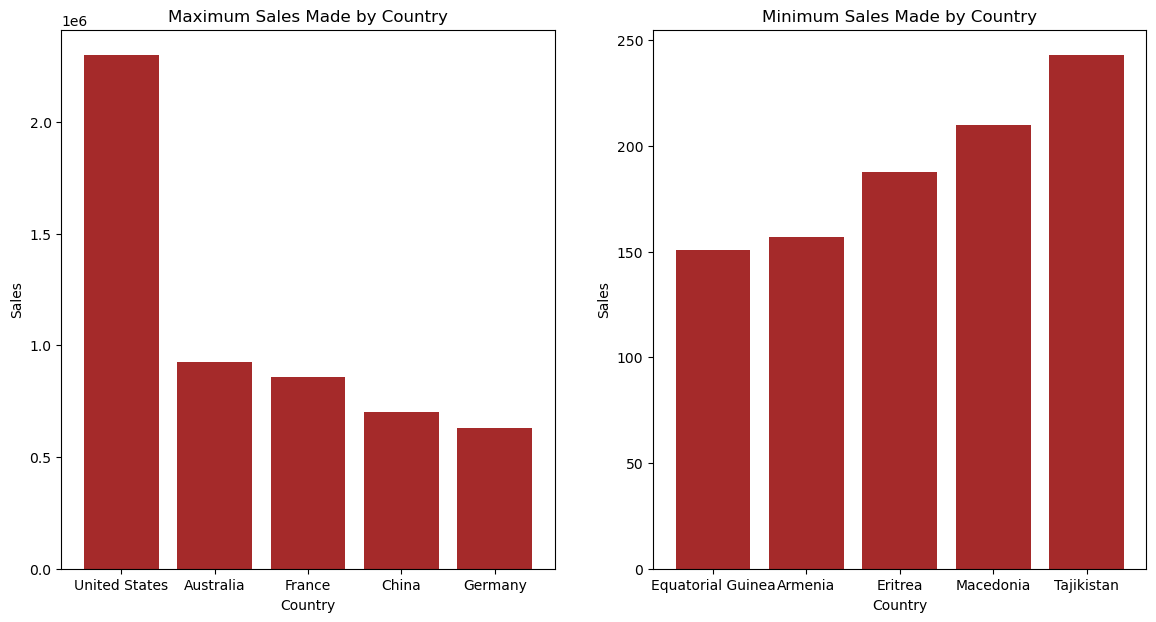

In [61]:
#PLOTS FOR HIGH AND LOW SALES COUNTRIES
plt.figure(figsize = (14,7))

plt.subplot(1,2,1)
plt.bar(max_sales_country.index, max_sales_country["Sales"], color="Brown")
plt.title("Maximum Sales Made by Country")
plt.xlabel("Country")
plt.ylabel("Sales")



plt.subplot(1,2,2)
plt.bar(min_sales_count.index, min_sales_count["Sales"], color= "Brown")
plt.title("Minimum Sales Made by Country")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.show()

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Row ID          51290 non-null  int64   
 1   Order ID        51290 non-null  object  
 2   Order Date      51290 non-null  object  
 3   Ship Date       51290 non-null  object  
 4   Ship Mode       51290 non-null  object  
 5   Customer ID     51290 non-null  object  
 6   Customer Name   51290 non-null  object  
 7   Segment         51290 non-null  object  
 8   City            51290 non-null  category
 9   State           51290 non-null  category
 10  Country         51290 non-null  category
 11  Postal Code     9994 non-null   float64 
 12  Market          51290 non-null  object  
 13  Region          51290 non-null  category
 14  Product ID      51290 non-null  object  
 15  Category        51290 non-null  object  
 16  Sub-Category    51290 non-null  category
 17  Product_name

### PRODUCTS WITH THE HIGHEST SALES

In [94]:
#CALCULATING THE TOTAL OF SALES AND GROUPING BY PRODUCT NAME
product_total_sales = data.groupby("Product_name")["Sales"].sum()

In [95]:
product_total_sales

Product_name
"While you Were Out" Message Book, One Form per Page                                                     25.228
#10 Gummed Flap White Envelopes, 100/Box                                                                 41.300
#10 Self-Seal White Envelopes                                                                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 286.672
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     477.660
iOttie HLCRIO102 Car Mount                                                                              215.892
iOttie XL Car Mount                                                                        

In [96]:
#CREATING A FRAME
product_total_sales = product_total_sales.to_frame()

In [97]:
#OUTLOOK
product_total_sales

,Sales
Product_name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660
iOttie HLCRIO102 Car Mount,215.892
iOttie XL Car Mount,223.888


In [98]:
#SORTING THE PRODUCT SALES
product_total_sales= product_total_sales.sort_values(by="Sales", ascending=False).head()

In [99]:
product_total_sales

,Sales
Product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240


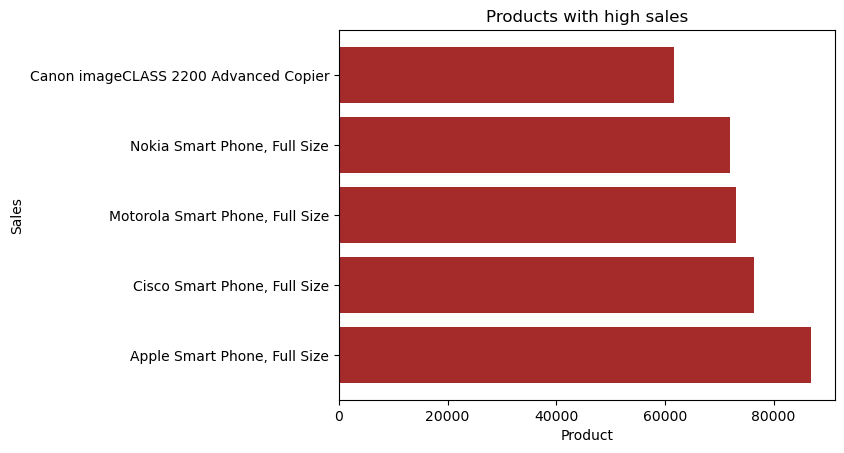

In [100]:
# CHART TO DISPLAY PRODUCTS WITH HIGH SALES
plt.barh(product_total_sales.index, product_total_sales["Sales"],color=['brown'])

plt.title("Products with high sales")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.show()

### SALES ANALYSIS INSIGHTS

From the analysis and visuals,the market with the highest sales is APAC followed by the EU markets. The Canada and Africa markets have the lowest sales.The top countries generating high sales are the US and Australia,while the countries with the least sales are Equitorial Guinea and Armenia.The products generating high sales are the Apple smartphone and the Cisco smart watch both in the Tech category.

# ANALYSIS OF THE PROFIT

### CREATING A CHART TO DISPLAY PROFITS IN THE MARKETS

In [101]:
#CALCULATING THE TOTAL OF PROFIT AND GROUPING BY MARKET
total_profit_market = data.groupby("Market")["Profit"].sum()

In [102]:
total_profit_market

Market
APAC      436000.04900
Africa     88871.63100
Canada     17817.39000
EMEA       43897.97100
EU        372829.74150
LATAM     221643.48708
US        286397.02170
Name: Profit, dtype: float64

In [103]:
total_profit_market = total_profit_market.to_frame()

In [104]:
#CREATING A FRAME FOR THE AVERAGE SALES DISPLAY
total_profit_market

,Profit
Market,
APAC,436000.04900
Africa,88871.63100
Canada,17817.39000
EMEA,43897.97100
EU,372829.74150
LATAM,221643.48708
US,286397.02170


In [105]:
#SORTING THE AVERAGE SALES PER MARKET IN ASCENDING ORDER
total_profit_market.sort_values(by="Profit",inplace =True)

In [106]:
total_profit_market

,Profit
Market,
Canada,17817.39000
EMEA,43897.97100
Africa,88871.63100
LATAM,221643.48708
US,286397.02170
EU,372829.74150
APAC,436000.04900


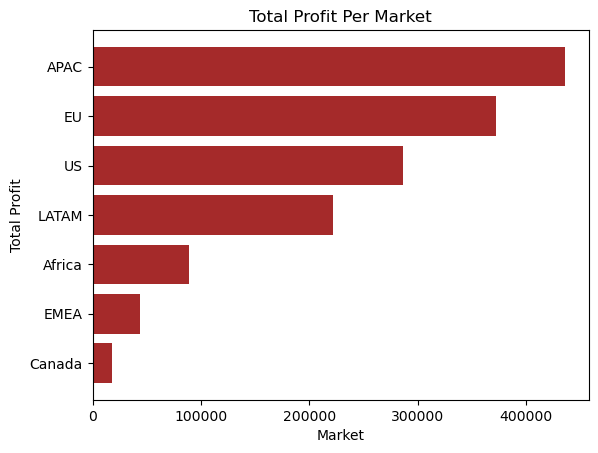

In [107]:
plt.barh(total_profit_market.index, total_profit_market["Profit"],color=['brown'])

plt.title("Total Profit Per Market")
plt.xlabel("Market")
plt.ylabel("Total Profit")
plt.show()

### DISPLAYING COUNTRIES WITH THE HIGHEST PROFITS

In [108]:
#CALCULATING THE TOTAL OF PROFIT AND GROUPING BY COUNTRY
max_profit_country = data.groupby("Country")["Profit"].sum()

In [109]:
max_profit_country

Country
Afghanistan     5460.30000
Albania          709.32000
Algeria         9106.50000
Angola          6494.97000
Argentina     -18693.79672
                  ...     
Venezuela     -11222.71044
Vietnam        -1870.23060
Yemen          -3706.45800
Zambia          7001.73000
Zimbabwe       -5428.78500
Name: Profit, Length: 147, dtype: float64

In [110]:
max_profit_country = max_profit_country.to_frame()

In [111]:
max_profit_country

,Profit
Country,
Afghanistan,5460.30000
Albania,709.32000
Algeria,9106.50000
Angola,6494.97000
Argentina,-18693.79672
...,...
Venezuela,-11222.71044
Vietnam,-1870.23060
Yemen,-3706.45800


In [112]:
max_profit_country = max_profit_country.sort_values(by = "Profit", ascending=False).head()

In [113]:
max_profit_country

,Profit
Country,
United States,286397.0217
China,150683.0850
India,129071.8350
United Kingdom,111900.1500
France,109029.0030


In [114]:
max_profit_country.index

CategoricalIndex(['United States', 'China', 'India', 'United Kingdom',
                  'France'],
                 categories=['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', ...], ordered=False, dtype='category', name='Country')

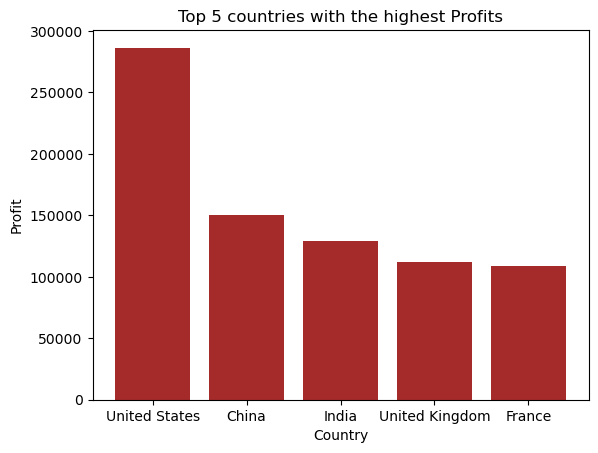

In [115]:
plt.bar(max_profit_country.index, max_profit_country["Profit"],color = ["Brown"])
plt.title("Top 5 countries with the highest Profits")
plt.xlabel("Country")
plt.ylabel("Profit")
plt.show()

### DISPLAYING THE 5 COUNTRIES WITH THE LEAST  PROFIT

In [116]:
#FINDING COUNTRIESS WITH LESS PROFITS
min_profit_count = data.groupby("Country")["Profit"].sum()

In [117]:
#DISPLAYING COUNTRIES
min_profit_count

Country
Afghanistan     5460.30000
Albania          709.32000
Algeria         9106.50000
Angola          6494.97000
Argentina     -18693.79672
                  ...     
Venezuela     -11222.71044
Vietnam        -1870.23060
Yemen          -3706.45800
Zambia          7001.73000
Zimbabwe       -5428.78500
Name: Profit, Length: 147, dtype: float64

In [118]:
#SORTING OUT
min_profit_count.tail().round(2)

Country
Venezuela   -11222.71
Vietnam      -1870.23
Yemen        -3706.46
Zambia        7001.73
Zimbabwe     -5428.78
Name: Profit, dtype: float64

<AxesSubplot:title={'center':'The 5 Countries Generating Least Profit'}, xlabel='Country', ylabel='Profit'>

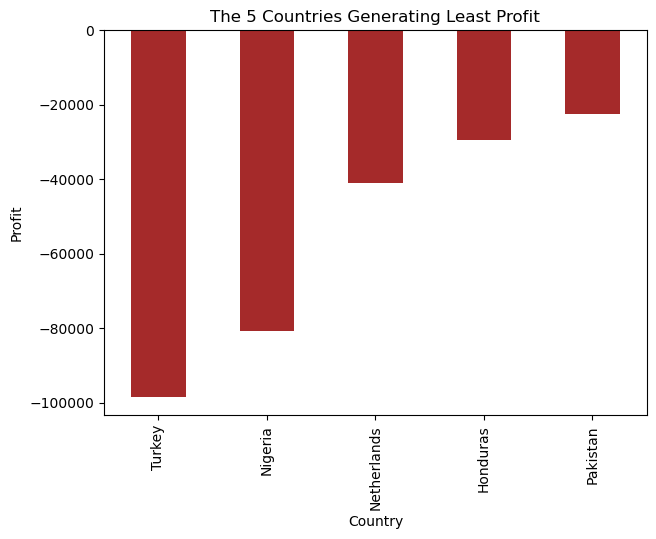

In [119]:
#CREATING THE CHART
plt.figure(figsize=(7,5))
plt.title('The 5 Countries Generating Least Profit')
plt.xlabel('Country')
plt.ylabel('Profit')
data.groupby('Country')['Profit'].sum().sort_values(ascending=True)[0:5].plot(kind='bar',color='brown')

### PRODUCTS GENERATING HIGH PROFITS

In [121]:
#CALCULATING THE TOTAL OF SALES AND GROUPING BY SHIP MODE
product_max_profit = data.groupby('Product_name')['Profit'].sum()

In [122]:
product_max_profit

Product_name
"While you Were Out" Message Book, One Form per Page                                                    10.3880
#10 Gummed Flap White Envelopes, 100/Box                                                                16.7678
#10 Self-Seal White Envelopes                                                                           52.1230
#10 White Business Envelopes,4 1/8 x 9 1/2                                                             223.1408
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                115.2806
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4    115.6440
iOttie HLCRIO102 Car Mount                                                                             -11.9940
iOttie XL Car Mount                                                                        

In [127]:
product_max_profit = pd.DataFrame(data.groupby(['Product_name'])[ 'Profit'].sum())
product_max_profit

,Profit
Product_name,
"""While you Were Out"" Message Book, One Form per Page",10.3880
"#10 Gummed Flap White Envelopes, 100/Box",16.7678
#10 Self-Seal White Envelopes,52.1230
"#10 White Business Envelopes,4 1/8 x 9 1/2",223.1408
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",115.2806
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",115.6440
iOttie HLCRIO102 Car Mount,-11.9940
iOttie XL Car Mount,-50.3748


In [129]:
#SORTING PRODUCTS WITH HIGH PROFITS
product_max_profit = product_max_profit.sort_values(by = "Profit", ascending=False).head(5)

In [130]:
product_max_profit

,Profit
Product_name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730


In [131]:
#CALLING OUT THE PRODUCTS
product_max_profit.index

Index(['Canon imageCLASS 2200 Advanced Copier', 'Cisco Smart Phone, Full Size',
       'Motorola Smart Phone, Full Size', 'Hoover Stove, Red',
       'Sauder Classic Bookcase, Traditional'],
      dtype='object', name='Product_name')

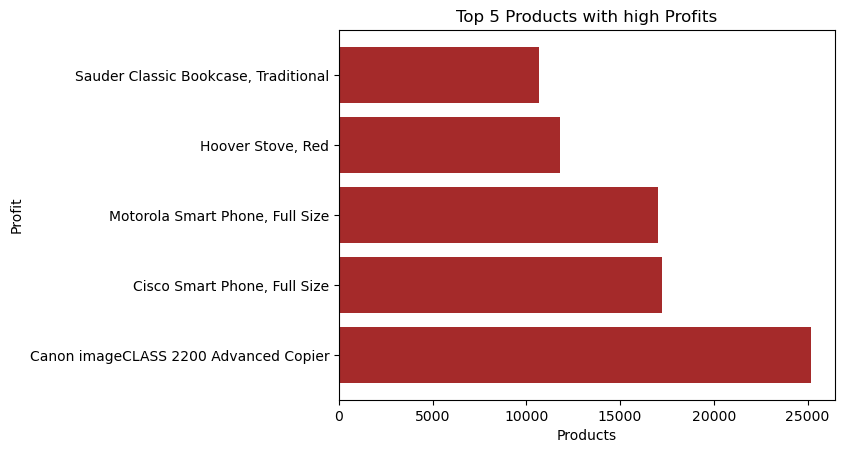

In [132]:
#CREATING CHART
plt.barh(product_max_profit.index, product_max_profit["Profit"],color=['brown'])

plt.title("Top 5 Products with high Profits")
plt.xlabel("Products")
plt.ylabel("Profit")
plt.show()

### INSIGHTS FROM THE PROFIT
From the analysis and visuals,the market with the highest profit just like with the sales is APAC followed by the EU markets. The Canada and Africa markets have the lowest sales.The top countries generating high sales are the US and China,while the countries with the least sales are Turkey and Nigeria.The products generating high profits are the Canon ImageCLASS and the Cisco smart watch both in the Tech category.

## CREATING A CHART TO DISPLAY THE SALES ,QUANTITY AND PROFITS MADE IN EACH CATEGORY

In [133]:
sqp_sum = pd.DataFrame(data.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
sqp_sum

,Sales,Profit,Quantity
Category,,,
Furniture,4.110874e+06,285204.72380,34954
Office Supplies,3.787070e+06,518473.83430,108182
Technology,4.744557e+06,663778.73318,35176


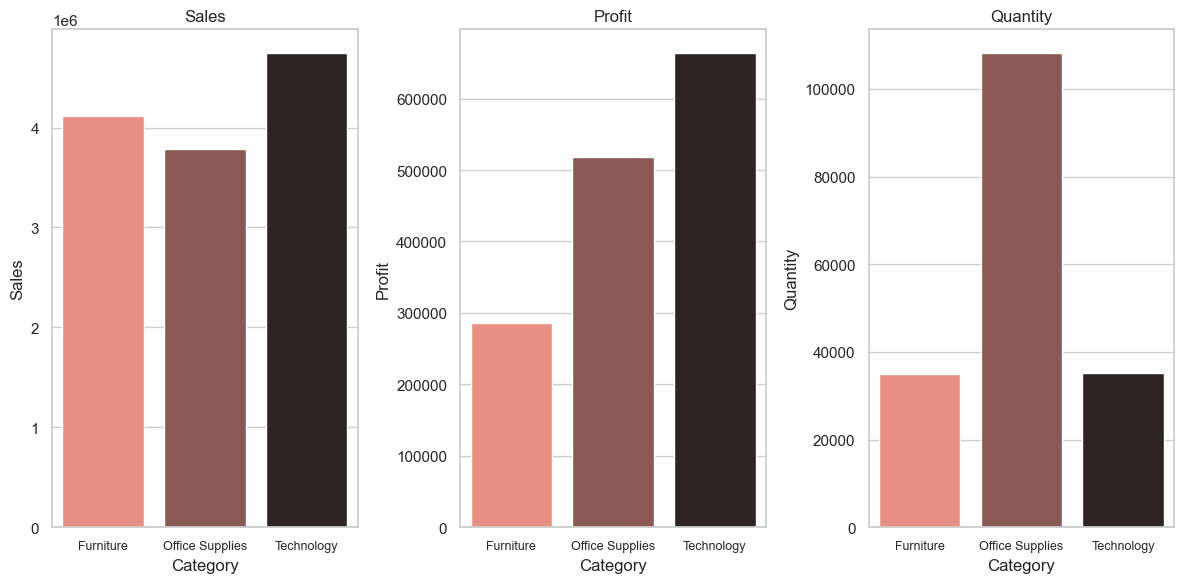

In [134]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(12, 6))
# Plot barplots
cat1 = sns.barplot(x = sqp_sum.index, y = sqp_sum.Sales, ax=axis[0], palette = "dark:salmon_r")
cat2 = sns.barplot(x = sqp_sum.index, y = sqp_sum.Profit, ax=axis[1], palette = "dark:salmon_r")
cat3 = sns.barplot(x = sqp_sum.index, y = sqp_sum.Quantity, ax=axis[2], palette = "dark:salmon_r")
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'horizontal', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'horizontal', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'horizontal', size = 9)
# Set spacing between subplots
figure.tight_layout()

### INSIGHTS FROM THE CATEGORY ANALYSIS
From the analysis and visuals
- Technology has the highest sales and profit 
- Office supplies had the highest quantity sold and that accounts for it having the second highest profit.
- The furniture category had the second highest sales made and yet the least profit and also the least in terms of quantity sold. This could be due to the fact that people dont buy furniture often,once they buy one ,it takes a longer time before they buy another.  


### ANALYSIS ON SUBCATEGORIES

In [139]:
df2_avg = pd.DataFrame(data.groupby(['Sub-Category'])[['Sales', 'Profit']].mean())

# Sort by descending order according to sales
sub_sales = pd.DataFrame(df2_avg.sort_values('Sales', ascending = False))
sub_sales = sub_df2.reset_index()
sub_sales

,index,Sub-Category,Sales,Profit
0,0,Tables,879.258913,-74.429023
1,1,Copiers,679.008670,116.314687
2,2,Bookcases,608.283800,67.160688
3,3,Appliances,576.105017,80.729681
4,4,Machines,524.266532,39.614989
5,5,Phones,508.437337,64.556749
6,6,Chairs,437.298126,40.884178
7,7,Accessories,243.654315,42.154896
8,8,Storage,222.788271,21.439314
9,9,Furnishings,121.633519,14.816223


In [136]:
 # Sort by descending order according to profit
sub_profit = pd.DataFrame(df2_avg.sort_values('Profit', ascending = False))
sub_profit= sub_profit.reset_index()
sub_profit

,Sub-Category,Sales,Profit
0,Copiers,679.008670,116.314687
1,Appliances,576.105017,80.729681
2,Bookcases,608.283800,67.160688
3,Phones,508.437337,64.556749
4,Accessories,243.654315,42.154896
5,Chairs,437.298126,40.884178
6,Machines,524.266532,39.614989
7,Storage,222.788271,21.439314
8,Paper,69.047970,16.734789
9,Furnishings,121.633519,14.816223


In [137]:
sub_df2.index

RangeIndex(start=0, stop=17, step=1)

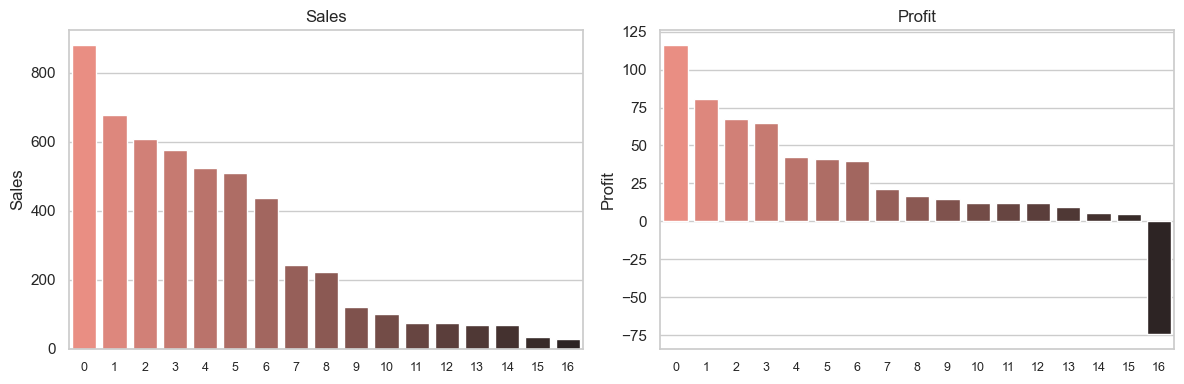

In [140]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(12, 4))
# Plot barplots
cat1 = sns.barplot(x = sub_sales.index, y = sub_sales.Sales, ax=axis[0], palette = "dark:salmon_r")
cat2 = sns.barplot(x = sub_profit.index, y = sub_profit.Profit, ax=axis[1], palette = "dark:salmon_r")
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'horizontal', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'horizontal', size = 9)
# Set spacing between subplots
figure.tight_layout()

In [141]:
# CALCULATING THE DISCOUNTS ON SUBCATEGORY
b = data.pivot_table('Quantity',index = 'Sub-Category', aggfunc='sum')
b = b.reset_index().sort_values('Quantity')
b

,Sub-Category,Quantity
16,Tables,3083
11,Machines,4906
1,Appliances,6078
6,Copiers,7454
4,Bookcases,8310
7,Envelopes,8380
8,Fasteners,8390
15,Supplies,8543
10,Labels,9322
0,Accessories,10946


<AxesSubplot:xlabel='Sub-Category'>

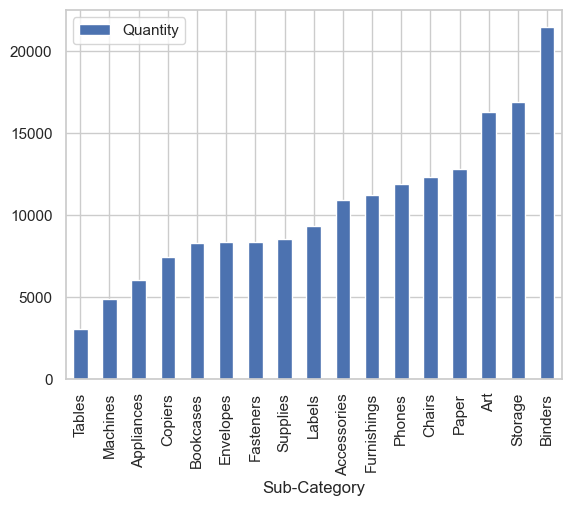

In [142]:
b.plot.bar(x= 'Sub-Category')

### INSIGHTS FROM SUBCSTEGORIES

- From the visual on the left,tables,copiers and bookcases have the highest sales.Paper,fasteners and labels have the lowest sales.
- From the visual on the right,the company has been generating losses from the sales of tables,labels and fasteners are also bringing in low profits. Copiers,appliances and bookcases have been bringing in high profits.
- The sub categories that are less profitable are tables,labes and fasteners.

In [143]:
# CALCULATING THE DISCOUNTS ON SUBCATEGORY
ds = data.pivot_table('Discount',index = 'Sub-Category', aggfunc='sum')
ds = ds.reset_index().sort_values('Discount')
ds

,Sub-Category,Discount
1,Appliances,248.700
16,Tables,250.320
11,Machines,252.000
6,Copiers,260.418
15,Supplies,310.200
10,Labels,313.890
7,Envelopes,320.810
8,Fasteners,340.240
0,Accessories,370.480
4,Bookcases,370.710


<AxesSubplot:xlabel='Sub-Category'>

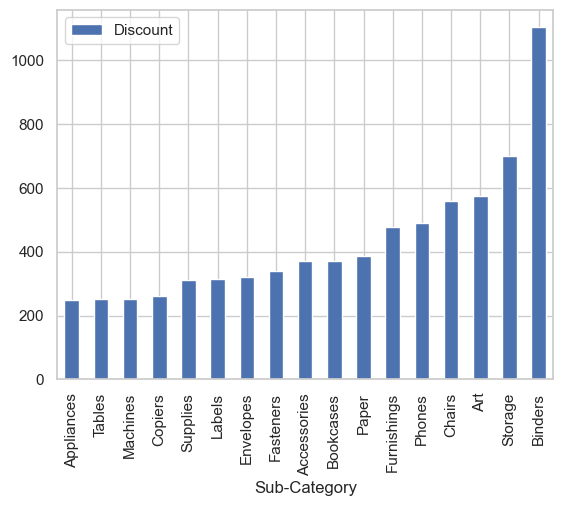

In [144]:
ds.plot.bar(x= 'Sub-Category')

### INSIGHTS FROM ANALYSIS OF DISCOUNTS ON SUBCATEGORY
- Appliances is one of the subcategory with high profits and yet low discounts on it.
- Tables is one category with high sales and less discounts and quantity.
- High discounts can be given on products bringing in high profits.

### ANALYSIS ON SEGMENT VRS SALES AND PROFIT

In [145]:
#CALCULATING THE TOTAL SALES AND GROUPING BY SEGMENT
segment_sales = data.groupby("Segment")["Sales"].sum()

In [146]:
segment_sales

Segment
Consumer       6.507949e+06
Corporate      3.824698e+06
Home Office    2.309855e+06
Name: Sales, dtype: float64

In [147]:
#TO FRAME
segment_sales = segment_sales.to_frame()

In [148]:
#TO SORT
segment_sales.sort_values(by="Sales",inplace =True)

In [149]:
segment_sales

,Sales
Segment,
Home Office,2.309855e+06
Corporate,3.824698e+06
Consumer,6.507949e+06


In [150]:
#CALCULATING THE TOTAL PROFIT AND GROUPING BY CSEGMENT
segment_profit = data.groupby("Segment")["Profit"].sum().round(3)

In [151]:
segment_profit

Segment
Consumer       749239.782
Corporate      441208.329
Home Office    277009.181
Name: Profit, dtype: float64

In [152]:
#TO FRAME
segment_profit = segment_profit.to_frame()

In [153]:
segment_profit

,Profit
Segment,
Consumer,749239.782
Corporate,441208.329
Home Office,277009.181


In [154]:
#TO SORT
segment_profit.sort_values(by="Profit",inplace =True)

In [155]:
segment_profit

,Profit
Segment,
Home Office,277009.181
Corporate,441208.329
Consumer,749239.782


In [156]:
#CALLING OUT THE SEGMENTS
segment_profit.index

Index(['Home Office', 'Corporate', 'Consumer'], dtype='object', name='Segment')

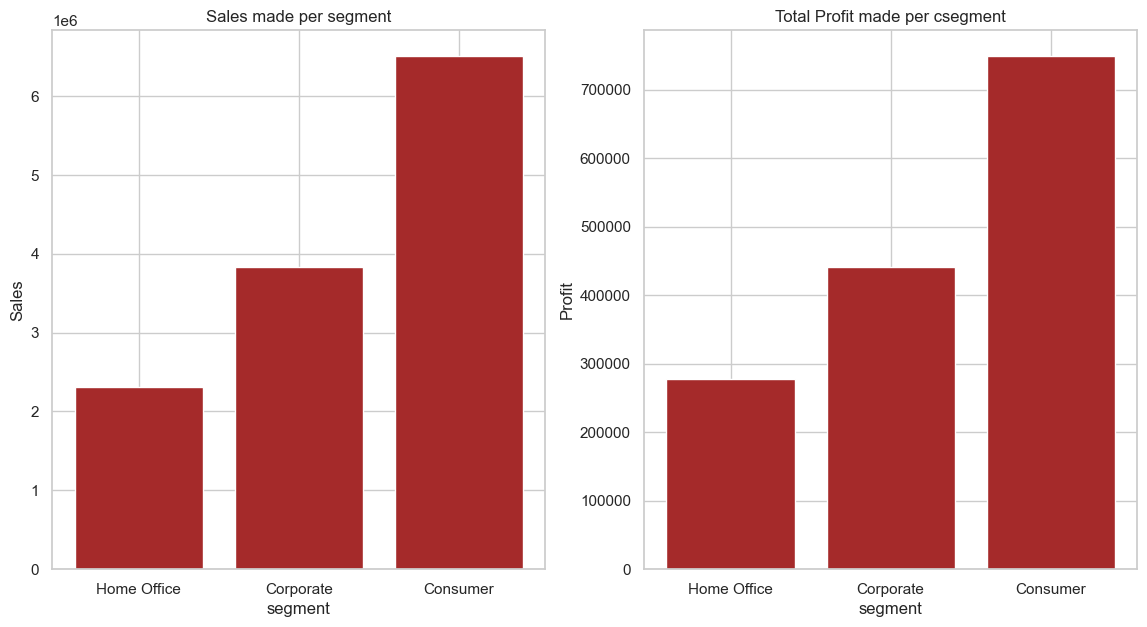

In [157]:
#PLOTS FOR SALES AND PROFITS PER CSEGMENT
plt.figure(figsize = (14,7))

plt.subplot(1,2,1)
plt.bar(segment_sales.index, segment_sales["Sales"], color="Brown")
plt.title("Sales made per segment")
plt.xlabel("segment")
plt.ylabel("Sales")



plt.subplot(1,2,2)
plt.bar(segment_profit.index, segment_profit["Profit"], color= "Brown")
plt.title("Total Profit made per csegment")
plt.xlabel("segment")
plt.ylabel("Profit")
plt.show()

### INSIGHTS FROM THE SEGMENT ANALYSIS
From the charts, the consumer segment is well in terms of sales and profits.

## CREATING A CHART TO DISPLAY THE DISCOUNT ACROSS COUNTRIES

In [158]:
#CALCULATING THE TOTAL OF DISCOUNTS AND GROUPING BY COUNTRIES
total_discount_countries = data.groupby("Country")["Discount"].sum()

In [159]:
total_discount_countries

Country
Afghanistan      0.000
Albania          0.000
Algeria          0.000
Angola           0.000
Argentina      168.952
                ...   
Venezuela       79.426
Vietnam         63.450
Yemen           21.000
Zambia           0.000
Zimbabwe        56.000
Name: Discount, Length: 147, dtype: float64

In [160]:
#FINDING OUT IF THE COUNTRIES IN THE TOP SALES AND PROFITS ARE PART OF THE COUNTRIES WITH TOP DISCOUNTS
pd.DataFrame(data.groupby('Country')['Discount'].sum().round().nlargest(20))

,Discount
Country,
United States,1561.0
Turkey,827.0
Nigeria,634.0
Indonesia,413.0
Australia,407.0
Honduras,290.0
Philippines,236.0
Brazil,233.0
Netherlands,210.0


In [161]:
v =pd.DataFrame(data.groupby('Country')['Discount'].sum().round().nlargest(10))

In [162]:
v

,Discount
Country,
United States,1561.0
Turkey,827.0
Nigeria,634.0
Indonesia,413.0
Australia,407.0
Honduras,290.0
Philippines,236.0
Brazil,233.0
Netherlands,210.0


In [163]:
v.index

CategoricalIndex(['United States', 'Turkey', 'Nigeria', 'Indonesia',
                  'Australia', 'Honduras', 'Philippines', 'Brazil',
                  'Netherlands', 'France'],
                 categories=['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', ...], ordered=False, dtype='category', name='Country')

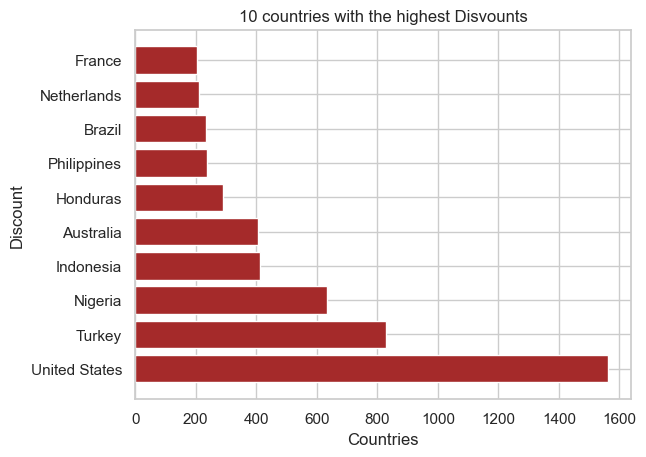

In [164]:
#CREATING CHART
plt.barh(v.index, v["Discount"],color=['brown'])

plt.title("10 countries with the highest Disvounts")
plt.xlabel("Countries")
plt.ylabel("Discount")
plt.show()

### INSIGHTS FROM DISCOUNT CHART
From the visual,
- US which leads in both sales and profits also has the highest discounts.
- Turkey and Nigeria are the countries also leading in discounts but are also the two leading countries generating low profits.
- Out of the 5 countries leading in high profits, US and France are the only countries amongst the first countries experiencing high discounts. 
- Discounts have an effect on the US market.

## CREATING A CHART TO DISPLAY THE TOTAL SALES AND PROFITS PER SHIP MODE

In [165]:
#CALCULATING THE TOTAL SALES AND GROUPING BY SHIP MODE
total_sales_shipmode = data.groupby("Ship Mode")["Sales"].sum()

In [166]:
total_sales_shipmode

Ship Mode
First Class       1.830976e+06
Same Day          6.672020e+05
Second Class      2.565672e+06
Standard Class    7.578652e+06
Name: Sales, dtype: float64

In [167]:
total_sales_shipmode.round(3)

Ship Mode
First Class       1830976.138
Same Day           667201.984
Second Class      2565671.681
Standard Class    7578652.107
Name: Sales, dtype: float64

In [168]:
#CREATING A FRAME
total_sales_shipmode = total_sales_shipmode.to_frame()

In [169]:
total_sales_shipmode.round(3)

,Sales
Ship Mode,
First Class,1830976.138
Same Day,667201.984
Second Class,2565671.681
Standard Class,7578652.107


In [170]:
#SORTING THE AVERAGE SALES PER SHIP MODE IN ASCENDING ORDER
total_sales_shipmode.sort_values(by="Sales",inplace =True)

In [171]:
total_sales_shipmode.round(3)

,Sales
Ship Mode,
Same Day,667201.984
First Class,1830976.138
Second Class,2565671.681
Standard Class,7578652.107


In [172]:
#CALLING OUT SHIP MODES
total_sales_shipmode.index

Index(['Same Day', 'First Class', 'Second Class', 'Standard Class'], dtype='object', name='Ship Mode')

In [173]:
# MOST CUSTOMERS OPT FOR THE STANDARD CLASS SHIPPING MODE

###  DISPLAYING THE TOTAL PROFIT PER SHIP MODE

In [174]:
#CALCULATING THE TOTAL OF SALES AND GROUPING BY SHIP MODE
total_profit_shipmode = data.groupby("Ship Mode")["Profit"].sum()

In [175]:
total_profit_shipmode

Ship Mode
First Class       208104.67520
Same Day           76173.06780
Second Class      292583.52708
Standard Class    890596.02120
Name: Profit, dtype: float64

In [176]:
#CREATING A FRAME
total_profit_shipmode = total_profit_shipmode.to_frame()

In [177]:
total_profit_shipmode

,Profit
Ship Mode,
First Class,208104.67520
Same Day,76173.06780
Second Class,292583.52708
Standard Class,890596.02120


In [178]:
total_profit_shipmode.sort_values(by="Profit",inplace =True)

In [179]:
total_profit_shipmode

,Profit
Ship Mode,
Same Day,76173.06780
First Class,208104.67520
Second Class,292583.52708
Standard Class,890596.02120


In [180]:
total_profit_shipmode.index

Index(['Same Day', 'First Class', 'Second Class', 'Standard Class'], dtype='object', name='Ship Mode')

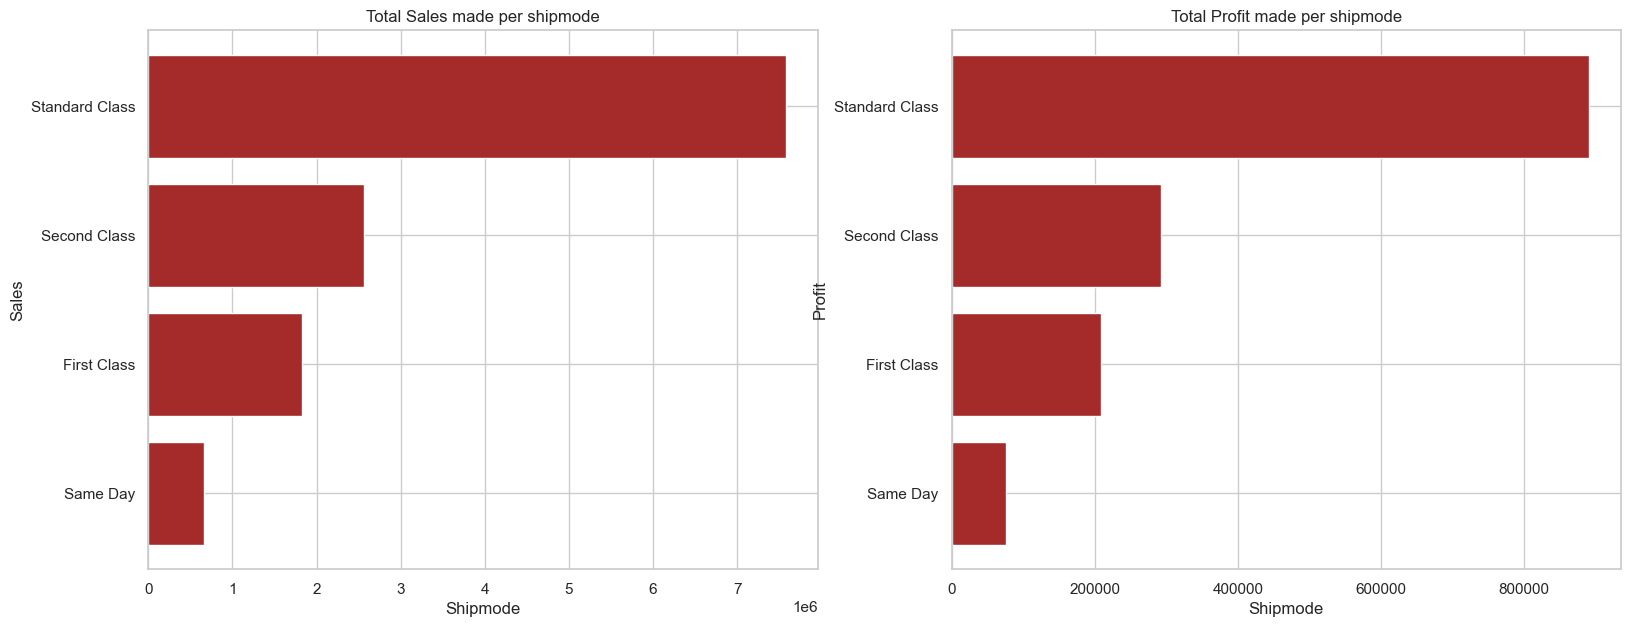

In [181]:
#PLOTS FOR SALES AND PROFITS PER SHIPMODE
plt.figure(figsize = (19,7))

plt.subplot(1,2,1)
plt.barh(total_sales_shipmode.index, total_sales_shipmode["Sales"], color="Brown")
plt.title("Total Sales made per shipmode")
plt.xlabel("Shipmode")
plt.ylabel("Sales")



plt.subplot(1,2,2)
plt.barh(total_profit_shipmode.index, total_profit_shipmode["Profit"], color= "Brown")
plt.title("Total Profit made per shipmode")
plt.xlabel("Shipmode")
plt.ylabel("Profit")
plt.show()

### INSIGHTS FROM THE SHIPMODE DATA
- From the analysis and visuals, the standard ship mode generates the highest profits and sales and this is because it is the most used. 
- In wanting to generate more sales,management should ensure its always available.

## CREATING A CHART TO STUDY THE SALES TREND OVER THE YEARS

In [182]:
#data['date'] = pd.to_datetime(data['date'])
#df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month

In [183]:
#CHANGING THE ORDER DATE DATA TYPE AND RETRIEVING ONLY THE YEARS
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['year']= data['Order Date'].dt.year
data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2014' in DD/MM/YYYY format. Provide format or specif

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product_name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,2011
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,2011
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,2011
3,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,2011
4,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,2014-12-31,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,2014
51286,47594,MO-2014-2560,2014-12-31,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,2014
51287,8857,MX-2014-110527,2014-12-31,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,2014
51288,6852,MX-2014-114783,2014-12-31,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium,2014


In [184]:
#CONFIRMING DATA TYPE HAS BEEN CHANGED AND YEAR COLUMN ALSO CREATED
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  object        
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  category      
 9   State           51290 non-null  category      
 10  Country         51290 non-null  category      
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  category      
 14  Product ID      51290 non-null  object        
 15  Ca

In [185]:
#CALCULATING THE TOTAL OF SALES AND GROUPING BY YEARS
total_sales_year = data.groupby("year")["Sales"].sum()

In [186]:
total_sales_year

year
2011    2.259451e+06
2012    2.677439e+06
2013    3.405746e+06
2014    4.299866e+06
Name: Sales, dtype: float64

In [187]:
#CALLING OUT YEARS
total_sales_year.index

Int64Index([2011, 2012, 2013, 2014], dtype='int64', name='year')

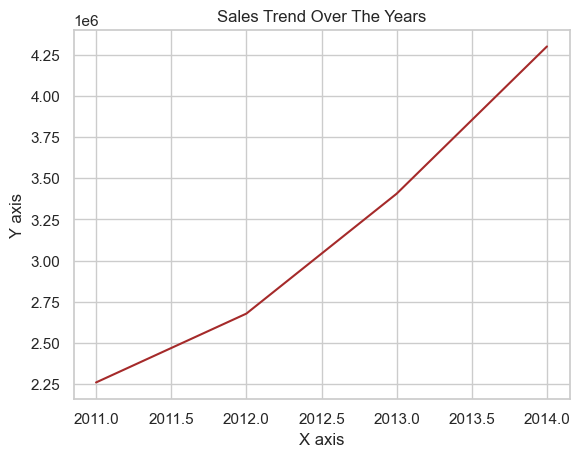

In [188]:
#PLOTTING THE CHART
x = total_sales_year.index
y = total_sales_year
plt.plot(x,y,color = "brown")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Sales Trend Over The Years")
plt.show()

## CREATING A CHART TO DISPLAY PROFIT TRENDS OVER THE YEARS

In [189]:
#CALCULATING THE TOTAL PROFIT AND GROUPING BY YEARS
total_profit_year = data.groupby("year")["Profit"].sum()

In [190]:
total_profit_year

year
2011    248940.81154
2012    307415.27910
2013    406935.23018
2014    504165.97046
Name: Profit, dtype: float64

In [191]:
#CREATING A FRAME
total_profit_year = total_profit_year.to_frame()

In [192]:
total_profit_year

,Profit
year,
2011,248940.81154
2012,307415.27910
2013,406935.23018
2014,504165.97046


In [193]:
#CALLING OUT YEARS
total_profit_year.index

Int64Index([2011, 2012, 2013, 2014], dtype='int64', name='year')

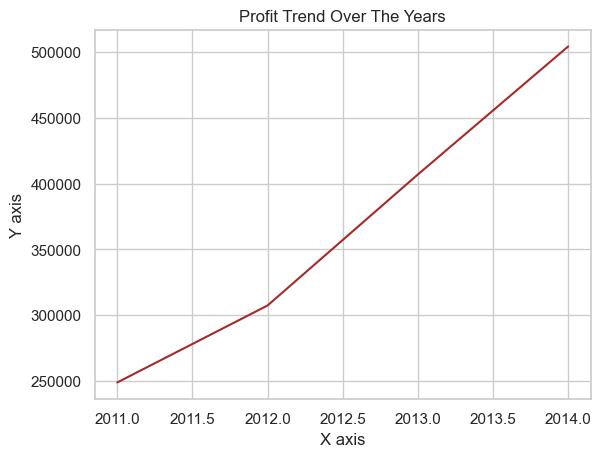

In [194]:
#PLOTTING THE CHART
x = total_profit_year.index
y = total_profit_year
plt.plot(x,y,color = "brown")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Profit Trend Over The Years")
plt.show()

## ANALYZING THE SHIPPING COST PER MARKET

In [195]:
#CALCULATING THE TOTAL OF SHIPPING COST AND GROUPING BY MARKET
total_ship_market = data.groupby("Market")["Shipping Cost"].mean()

In [196]:
total_ship_market

Market
APAC      35.190430
Africa    19.215058
Canada    19.285495
EMEA      17.573221
EU        30.942235
LATAM     22.745153
US        23.831678
Name: Shipping Cost, dtype: float64

In [198]:
total_ship_market = pd.DataFrame(data.groupby(['Market'])[['Shipping Cost']].mean())
total_ship_market

,Shipping Cost
Market,
APAC,35.190430
Africa,19.215058
Canada,19.285495
EMEA,17.573221
EU,30.942235
LATAM,22.745153
US,23.831678


In [200]:
total_ship_market.index

Index(['APAC', 'Africa', 'Canada', 'EMEA', 'EU', 'LATAM', 'US'], dtype='object', name='Market')

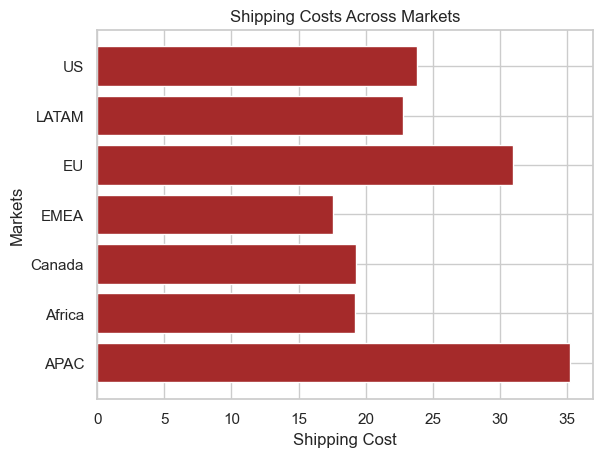

In [202]:
#CREATING CHART
plt.barh(total_ship_market.index, total_ship_market["Shipping Cost"],color=['brown'])

plt.title("Shipping Costs Across Markets")
plt.xlabel("Shipping Cost")
plt.ylabel("Markets")
plt.show()

## CONCLUSIONS

THE COMPANY HAS EXPERIENCED TREMENDOUS INCREASE IN SALES EACH YEAR FOR THE 4 YEARS UNDER STUDY.

THE 3 MARKETS GENERATING HIGH SALES ARE THE APAC,US AND THE EU MARKETS.

The countries generating high profits like USA also have the highest discounts.

OUT OF THE TOP 5 COUNTRIES GENERATING HIGH SALES (US,ITALY,JAPAN,SPAIN,NEW ZEALAND),ONLY USA IS GENERATING HIGH PROFITS.
THE OTHER 4 COUNTRIES GENERATING HIGH PROFITS ARE CHINA,INDIA,UK AND FRANCE AND THESE ARE COUNTRIES THAT ARE NOT EVEN PART OF THE 
TOP TEN COUNTRIES WHEN IT COMES TO COUNTRIES WITH HIGH DISCOUNTS EXCEPT THE USA. 
AND THIS MAY AS A RESULT OF THE TECH BUZZ IN THESE COUNTRIES

DISCOUNTS AFFECT SALES AND PROFITS ESPECIALLY IN THE APAC AND US MARKETS,MOST OF THE MARKETS WITH HIGH DISCOUNTS EXPERIENCED
HIGH SALES AND PROFITS.AND COUNTRIES THAT EXPERIENCED LOW SALES AND LOSSES ARE AMONG  THE COUNTRIES WITH LESS DISCOUNTS.

NIGERIA, A COUNTRY IN THE AFRICAN MARKET IS ONE OF THE TOP 3 COUNTRIES WITH HIGH DISCOUNTS AND YET LOW SALES.MORE ANALYSIS 
NEEDS TO ALSO BE DONE TO SEE WHAT THE PROBLEM LIES.





## RECOMMENDATIONS

In order to push the other high profit generating countries to get more sales,more discounts can be awarded in these countries.

The category of products generating high sales and profits is the Tech category. This is likely due to the tech-trend wave and
lots of people are jumping into the niche. In order to ensure smooth sales,its advisable to never be short of Tech related products.

The standard shipping mode is the most used. If we are looking to expanding sales and making more profits, efforts should be made in expanding the vailability of this shipping mode . Other shipping modes can could also be made more attractive to customers.

If more data is gathered and analyzed,we can ascertain why some countries especially in Africa are generating losses.

In [ ]:
# Saving file


In [203]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product_name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'year'],
      dtype='object')

In [204]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product_name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [205]:
superstore_2011 = df.loc[df["Order Date"].dt.floor("D").dt.year == 2011]
superstore_2012 = df.loc[df["Order Date"].dt.floor("D").dt.year == 2012]
superstore_2013 = df.loc[df["Order Date"].dt.floor("D").dt.year == 2013]
superstore_2014 = df.loc[df["Order Date"].dt.floor("D").dt.year == 2014]
superstore_2015 = df.loc[df["Order Date"].dt.floor("D").dt.year == 2015]

NameError: name 'df' is not defined

In [206]:
df = data[["Customer ID","Quantity","Order Date","Order ID","Sales"]]

In [207]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product_name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [208]:
df.dtypes

Customer ID            object
Quantity                int64
Order Date     datetime64[ns]
Order ID               object
Sales                 float64
dtype: object

### Changing the order date from object to datetime

In [209]:
df["Order Date"]= pd.to_datetime(df["Order Date"])

C:\Users\EDNA\AppData\Local\Temp\ipykernel_13372\2244560242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Order Date"]= pd.to_datetime(df["Order Date"])


In [210]:
df.dtypes

Customer ID            object
Quantity                int64
Order Date     datetime64[ns]
Order ID               object
Sales                 float64
dtype: object

### Writing a function to change a given date object to only the first day of the month

In [211]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

### Applying the function to the order date and storing it in order month

In [212]:
df["Order Month"] = df["Order Date"].apply(get_month)

C:\Users\EDNA\AppData\Local\Temp\ipykernel_13372\2198679455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Order Month"] = df["Order Date"].apply(get_month)


In [213]:
df.head()

,Customer ID,Quantity,Order Date,Order ID,Sales,Order Month
0,TB-11280,2,2011-01-01,AG-2011-2040,408.300,2011-01-01
1,JH-15985,3,2011-01-01,IN-2011-47883,120.366,2011-01-01
2,AT-735,4,2011-01-01,HU-2011-1220,66.120,2011-01-01
3,EM-14140,3,2011-01-01,IT-2011-3647632,44.865,2011-01-01
4,JH-15985,5,2011-01-01,IN-2011-47883,113.670,2011-01-01


### Finding the length of customer id that are unique

In [214]:
len(df["Customer ID"].unique())

1590

### Grouped customer id and order month and used transform() together with min() function to assign the smallest order month value to each customer.

In [215]:
grouped =df.groupby("Customer ID")["Order Month"]
grouped

In [216]:
df["Batch Month"] = grouped.transform(min)

C:\Users\EDNA\AppData\Local\Temp\ipykernel_13372\1037492561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Batch Month"] = grouped.transform(min)


In [217]:
df.head(20)

,Customer ID,Quantity,Order Date,Order ID,Sales,Order Month,Batch Month
0,TB-11280,2,2011-01-01,AG-2011-2040,408.300,2011-01-01,2011-01-01
1,JH-15985,3,2011-01-01,IN-2011-47883,120.366,2011-01-01,2011-01-01
2,AT-735,4,2011-01-01,HU-2011-1220,66.120,2011-01-01,2011-01-01
3,EM-14140,3,2011-01-01,IT-2011-3647632,44.865,2011-01-01,2011-01-01
4,JH-15985,5,2011-01-01,IN-2011-47883,113.670,2011-01-01,2011-01-01
5,JH-15985,2,2011-01-01,IN-2011-47883,55.242,2011-01-01,2011-01-01
6,PO-18865,2,2011-01-02,IN-2011-30733,285.780,2011-01-01,2011-01-01
7,LC-17050,2,2011-01-02,CA-2011-115161,290.666,2011-01-01,2011-01-01
8,DK-3150,1,2011-01-02,AO-2011-1390,206.400,2011-01-01,2011-01-01
9,SP-20650,3,2011-01-02,ID-2011-56493,162.720,2011-01-01,2011-01-01


### THis function extracts integer values of the year

In [218]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

### Finding the number of months between any order and the first order for each customer

In [219]:
order_year, order_month, _ = get_date_int(df, "Order Month")
batch_year, batch_month, _ = get_date_int(df, "Batch Month")

### Finding the differnces in years and months between them

In [220]:
years_diff = order_year - batch_year
months_diff = order_month - batch_month

### Changing the total difference to months by multiplying the year difference by 12 and adding them together

In [221]:
df["Batch Index"] = years_diff*12 + months_diff + 1

C:\Users\EDNA\AppData\Local\Temp\ipykernel_13372\4220384734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Batch Index"] = years_diff*12 + months_diff + 1


In [222]:
df.tail(40)

,Customer ID,Quantity,Order Date,Order ID,Sales,Order Month,Batch Month,Batch Index
51250,MH-17785,4,2014-12-31,IN-2014-78228,293.6208,2014-12-01,2011-03-01,46
51251,RR-19525,4,2014-12-31,MX-2014-122511,155.3920,2014-12-01,2011-06-01,43
51252,MW-8235,1,2014-12-31,OD-2014-9490,378.3000,2014-12-01,2011-12-01,37
51253,KL-6645,6,2014-12-31,AO-2014-7730,126.7200,2014-12-01,2013-06-01,19
51254,TC-21535,3,2014-12-31,MX-2014-158827,135.4800,2014-12-01,2011-03-01,46
51255,PB-9105,1,2014-12-31,RS-2014-1460,43.8000,2014-12-01,2014-01-01,12
51256,PO-18865,7,2014-12-31,CA-2014-143259,90.9300,2014-12-01,2011-01-01,48
51257,CC-12430,2,2014-12-31,CA-2014-126221,209.3000,2014-12-01,2011-01-01,48
51258,FW-4395,12,2014-12-31,UP-2014-3330,138.2400,2014-12-01,2011-03-01,46
51259,EB-13975,1,2014-12-31,MX-2014-116267,74.8000,2014-12-01,2011-07-01,42


In [223]:
df["Batch Index"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype=int64)

In [224]:
grouped = df.groupby(["Batch Month", "Batch Index"])
batch_data = grouped['Customer ID'].apply(pd.Series.nunique)
batch_data = batch_data.reset_index()
batch_counts = batch_data.pivot(index="Batch Month", columns="Batch Index", values="Customer ID")

In [225]:
batch_counts

Batch Index,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Batch Month,,,,,,,,,,,,,,,,,,,,,
2011-01-01,266.0,58.0,77.0,62.0,56.0,75.0,73.0,70.0,84.0,72.0,...,103.0,103.0,100.0,120.0,98.0,117.0,127.0,140.0,135.0,140.0
2011-02-01,165.0,39.0,38.0,39.0,55.0,29.0,42.0,46.0,42.0,52.0,...,60.0,72.0,79.0,58.0,85.0,85.0,75.0,87.0,74.0,NaN
2011-03-01,186.0,38.0,27.0,53.0,37.0,47.0,58.0,50.0,57.0,67.0,...,74.0,89.0,64.0,76.0,95.0,74.0,93.0,96.0,NaN,NaN
2011-04-01,125.0,26.0,30.0,31.0,28.0,37.0,34.0,33.0,40.0,18.0,...,65.0,32.0,45.0,41.0,58.0,53.0,52.0,NaN,NaN,NaN
2011-05-01,103.0,26.0,19.0,33.0,29.0,24.0,29.0,28.0,21.0,24.0,...,24.0,44.0,42.0,38.0,52.0,52.0,NaN,NaN,NaN,NaN
2011-06-01,119.0,31.0,25.0,35.0,19.0,32.0,34.0,17.0,21.0,32.0,...,50.0,44.0,56.0,57.0,49.0,NaN,NaN,NaN,NaN,NaN
2011-07-01,64.0,12.0,13.0,18.0,17.0,19.0,7.0,10.0,16.0,13.0,...,23.0,24.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,85.0,18.0,16.0,17.0,15.0,15.0,15.0,14.0,18.0,20.0,...,31.0,36.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,75.0,12.0,14.0,16.0,10.0,7.0,10.0,9.0,14.0,18.0,...,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
batch_sizes = batch_counts.iloc[:, 0]

In [227]:
batch_sizes

Batch Month
2011-01-01    266.0
2011-02-01    165.0
2011-03-01    186.0
2011-04-01    125.0
2011-05-01    103.0
2011-06-01    119.0
2011-07-01     64.0
2011-08-01     85.0
2011-09-01     75.0
2011-10-01     39.0
2011-11-01     40.0
2011-12-01     42.0
2012-01-01     20.0
2012-02-01     20.0
2012-03-01     21.0
2012-04-01     12.0
2012-05-01     14.0
2012-06-01     27.0
2012-07-01     14.0
2012-08-01     24.0
2012-09-01     20.0
2012-10-01      9.0
2012-11-01     16.0
2012-12-01     13.0
2013-01-01      8.0
2013-02-01      7.0
2013-03-01      9.0
2013-04-01      7.0
2013-05-01      3.0
2013-06-01      7.0
2013-07-01      2.0
2013-08-01      4.0
2013-09-01      2.0
2013-10-01      3.0
2013-11-01      1.0
2013-12-01      3.0
2014-01-01      3.0
2014-02-01      3.0
2014-03-01      1.0
2014-04-01      1.0
2014-05-01      1.0
2014-06-01      2.0
2014-07-01      3.0
2014-10-01      1.0
Name: 1, dtype: float64

In [228]:
retention = batch_counts.divide(batch_sizes, axis = 0)

In [229]:
retention.round(3) *100

Batch Index,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Batch Month,,,,,,,,,,,,,,,,,,,,,
2011-01-01,100.0,21.8,28.9,23.3,21.1,28.2,27.4,26.3,31.6,27.1,...,38.7,38.7,37.6,45.1,36.8,44.0,47.7,52.6,50.8,52.6
2011-02-01,100.0,23.6,23.0,23.6,33.3,17.6,25.5,27.9,25.5,31.5,...,36.4,43.6,47.9,35.2,51.5,51.5,45.5,52.7,44.8,NaN
2011-03-01,100.0,20.4,14.5,28.5,19.9,25.3,31.2,26.9,30.6,36.0,...,39.8,47.8,34.4,40.9,51.1,39.8,50.0,51.6,NaN,NaN
2011-04-01,100.0,20.8,24.0,24.8,22.4,29.6,27.2,26.4,32.0,14.4,...,52.0,25.6,36.0,32.8,46.4,42.4,41.6,NaN,NaN,NaN
2011-05-01,100.0,25.2,18.4,32.0,28.2,23.3,28.2,27.2,20.4,23.3,...,23.3,42.7,40.8,36.9,50.5,50.5,NaN,NaN,NaN,NaN
2011-06-01,100.0,26.1,21.0,29.4,16.0,26.9,28.6,14.3,17.6,26.9,...,42.0,37.0,47.1,47.9,41.2,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.8,20.3,28.1,26.6,29.7,10.9,15.6,25.0,20.3,...,35.9,37.5,45.3,48.4,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.2,18.8,20.0,17.6,17.6,17.6,16.5,21.2,23.5,...,36.5,42.4,42.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,100.0,16.0,18.7,21.3,13.3,9.3,13.3,12.0,18.7,24.0,...,33.3,33.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Retention Rates'}, xlabel='Batch Index', ylabel='Batch Month'>

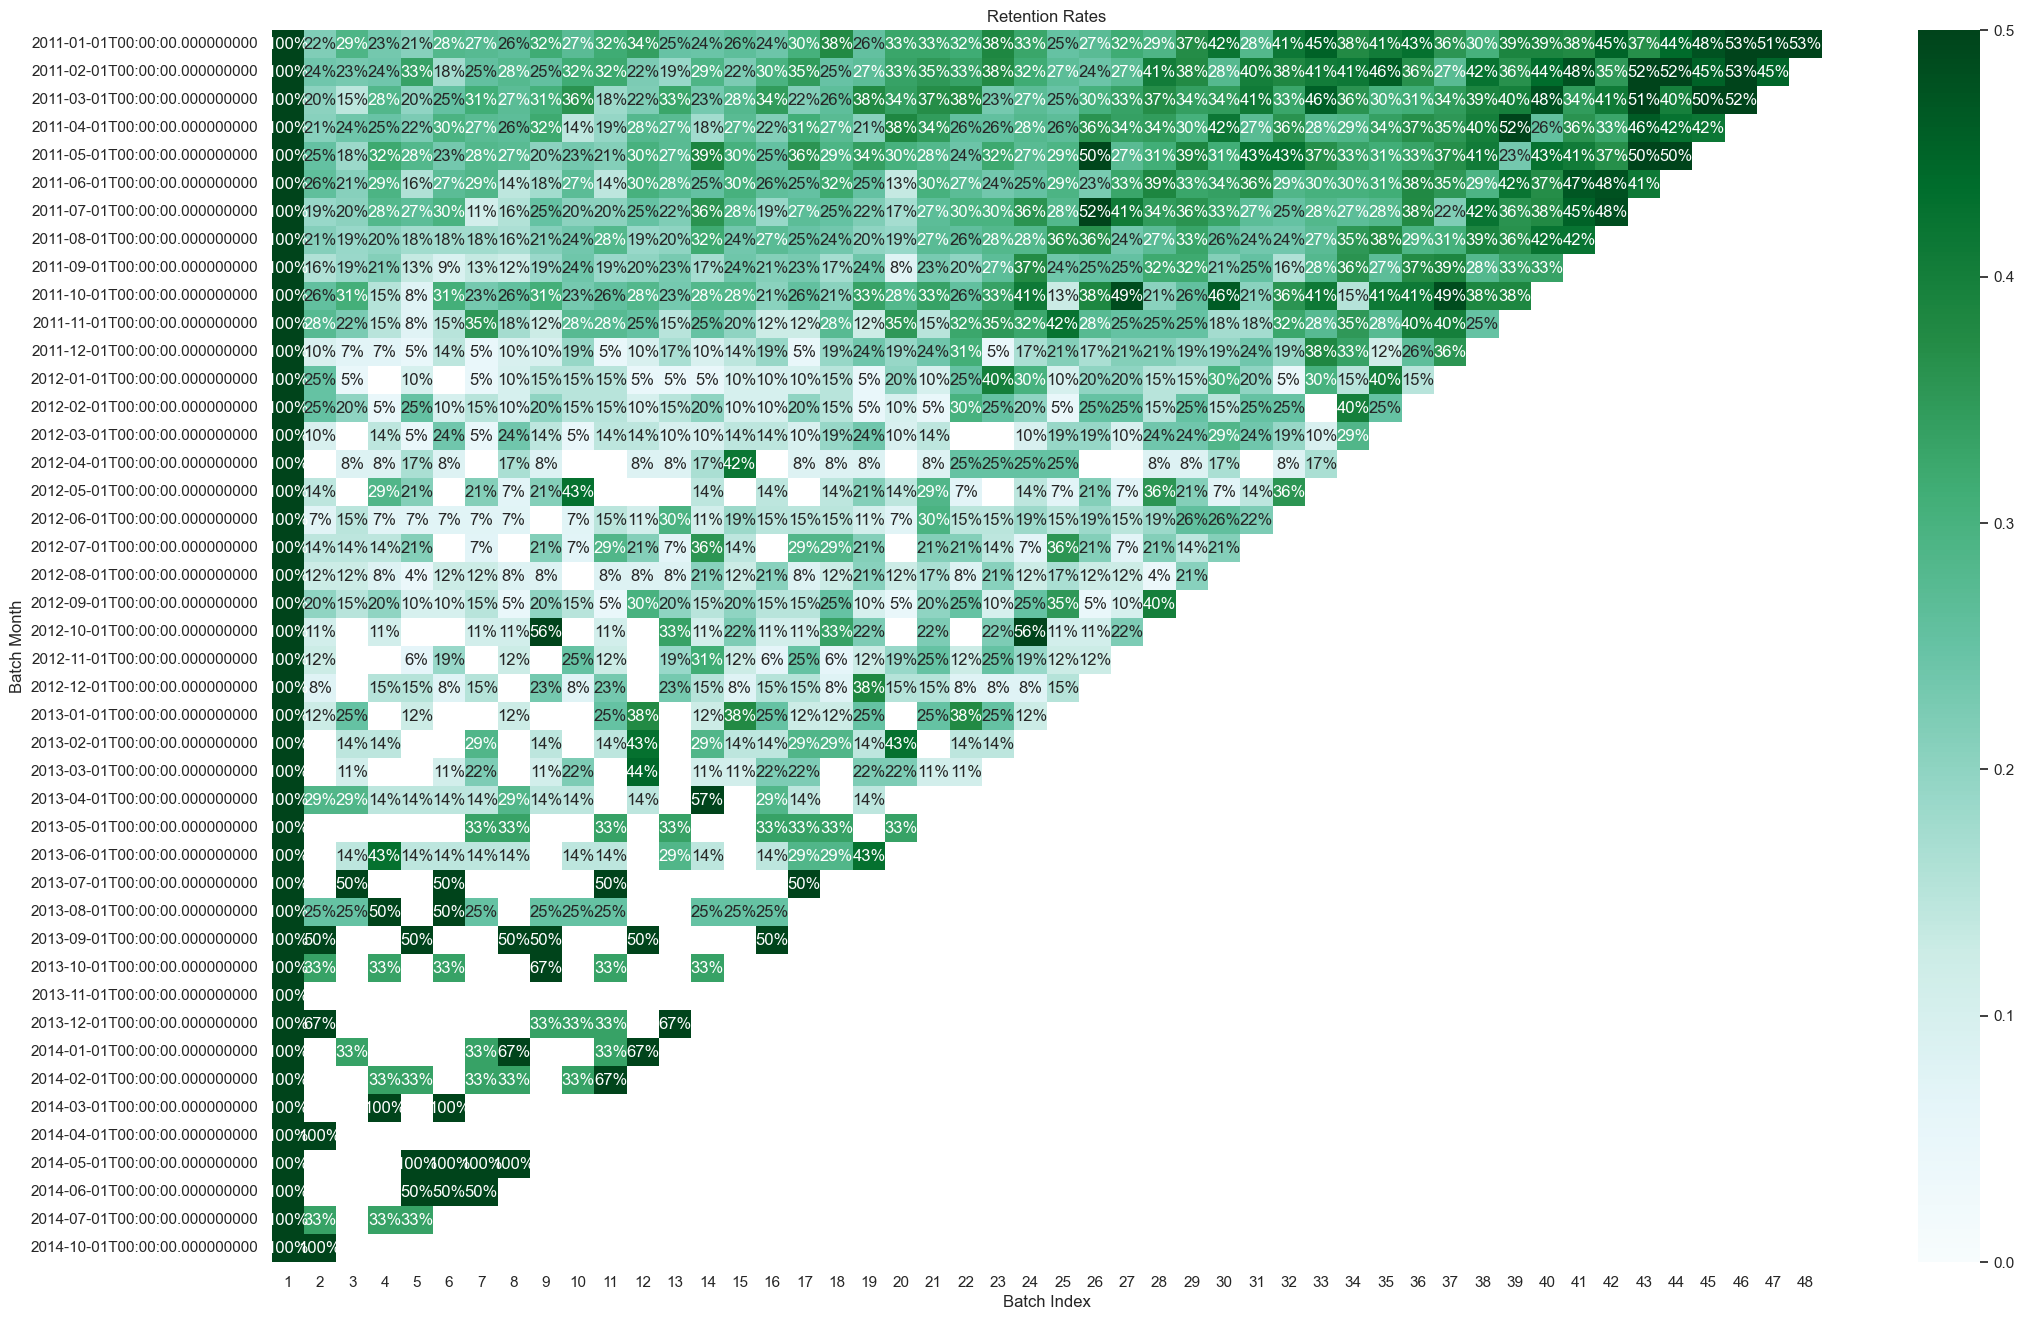

In [230]:
plt.figure(figsize=(25,16))
plt.title("Retention Rates")
sns.heatmap(data=retention, annot=True, fmt=".0%", vmin=0.0, vmax=0.5, cmap="BuGn")

### RFM SEGMENTATION

In [231]:
df = data[["Customer ID","Quantity","Order Date","Order ID","Sales"]]

In [232]:
df["Order Date"]=pd.to_datetime(data["Order Date"])
#df["Sales"] = data["Quantity"]*df["UnitPrice"]

C:\Users\EDNA\AppData\Local\Temp\ipykernel_13372\3344136444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Order Date"]=pd.to_datetime(data["Order Date"])


In [233]:
min(df["Order Date"])

Timestamp('2011-01-01 00:00:00')

In [234]:
max(df["Order Date"])

Timestamp('2014-12-31 00:00:00')

In [235]:
# Add one more day to the max of the Order Date
snapshot_date = max(df["Order Date"]) + dt.timedelta(days=1)

### CALCLULATE RFM METRICS

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer ID  51290 non-null  object        
 1   Quantity     51290 non-null  int64         
 2   Order Date   51290 non-null  datetime64[ns]
 3   Order ID     51290 non-null  object        
 4   Sales        51290 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.0+ MB


In [237]:
datamart = df.groupby(["Customer ID"]).agg({
    "Order Date": lambda x: (snapshot_date-x.max()).days,
    "Order ID": "count",
    "Sales" : "sum"
})

In [238]:
# Rename columns 
datamart.rename(columns = {
    "Order Date": "Recency",
    "Order ID": "Frequency",
    "Sales": "MonetaryValue"
}, inplace=True)

In [239]:
datamart

,Recency,Frequency,MonetaryValue
Customer ID,,,
AA-10315,9,42,13747.41300
AA-10375,7,42,5884.19500
AA-10480,118,38,17695.58978
AA-10645,27,73,15343.89070
AA-315,3,8,2243.25600
...,...,...,...
YS-21880,10,54,18703.60600
ZC-11910,201,1,7.17300
ZC-21910,4,84,28472.81926


In [240]:
# Recency quartile
r_labels = range(4,0,-1)
r_quartiles = pd.qcut(datamart["Recency"], 4, labels = r_labels)
datamart = datamart.assign(R= r_quartiles.values)
datamart

,Recency,Frequency,MonetaryValue,R
Customer ID,,,,
AA-10315,9,42,13747.41300,4
AA-10375,7,42,5884.19500,4
AA-10480,118,38,17695.58978,1
AA-10645,27,73,15343.89070,3
AA-315,3,8,2243.25600,4
...,...,...,...,...
YS-21880,10,54,18703.60600,4
ZC-11910,201,1,7.17300,1
ZC-21910,4,84,28472.81926,4


In [241]:
# Frequency and monetary quartiles
f_labels = range(1,5)
m_labels = range(1,5)

f_quartiles = pd.qcut(datamart["Frequency"], 4, labels = f_labels)
m_quartiles = pd.qcut(datamart["MonetaryValue"], 4, labels = m_labels)


datamart = datamart.assign(F= f_quartiles.values)
datamart = datamart.assign(M= m_quartiles.values)
datamart

,Recency,Frequency,MonetaryValue,R,F,M
Customer ID,,,,,,
AA-10315,9,42,13747.41300,4,3,4
AA-10375,7,42,5884.19500,4,3,2
AA-10480,118,38,17695.58978,1,3,4
AA-10645,27,73,15343.89070,3,4,4
AA-315,3,8,2243.25600,4,1,2
...,...,...,...,...,...,...
YS-21880,10,54,18703.60600,4,4,4
ZC-11910,201,1,7.17300,1,1,1
ZC-21910,4,84,28472.81926,4,4,4


### BUILD RFM SEGMENT AND RFM SCORE

In [242]:
# Concatenate RFM quartile values to RFM_Segment
# Sum RFM quartiles values to RFM_Score

In [243]:
def join_rfm(x):
    return str(x["R"]) + str(x["F"]) + str(x["M"])

In [244]:
datamart["RFM_Segment"] = datamart.apply(join_rfm,axis=1)
datamart["RFM Score"] = datamart[["R","F","M"]].sum(axis=1)

In [245]:
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM Score
Customer ID,,,,,,,,
AA-10315,9,42,13747.41300,4,3,4,4.03.04.0,11
AA-10375,7,42,5884.19500,4,3,2,4.03.02.0,9
AA-10480,118,38,17695.58978,1,3,4,1.03.04.0,8
AA-10645,27,73,15343.89070,3,4,4,3.04.04.0,11
AA-315,3,8,2243.25600,4,1,2,4.01.02.0,7
...,...,...,...,...,...,...,...,...
YS-21880,10,54,18703.60600,4,4,4,4.04.04.0,12
ZC-11910,201,1,7.17300,1,1,1,1.01.01.0,3
ZC-21910,4,84,28472.81926,4,4,4,4.04.04.0,12


In [246]:
datamart.groupby("RFM_Segment").size().sort_values(ascending=False)[:10]

RFM_Segment
1.01.01.0    186
4.04.04.0    114
4.03.03.0    102
3.04.04.0     95
3.03.03.0     93
1.02.02.0     79
2.02.02.0     78
2.03.03.0     73
2.04.04.0     72
1.01.02.0     62
dtype: int64

In [247]:
# Filtering on RFM Segments
datamart[datamart["RFM_Segment"]=="111"]

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM Score
Customer ID,,,,,,,,


In [248]:
datamart.groupby("RFM Score").agg(
{
    "Recency": "mean",
    "Frequency": "mean",
    "MonetaryValue": ["mean", "count"]
}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM Score                                      
3           292.2       7.1         818.2   186
4           177.1      10.2        1624.1   153
5           136.6      14.2        2402.2   166
6            57.9      15.6        2748.3   144
7            41.2      20.2        3860.6   112
8            44.6      33.0        7373.8   139
9            40.9      44.9       11341.8   170
10           29.1      50.6       13781.7   236
11           18.0      58.7       15649.2   170
12            6.7      64.8       18851.0   114

In [249]:
def segment_me(df):
    if df["RFM Score"] >= 9:
        return "Best"
    elif (df["RFM Score"] >= 5) and (df["RFM Score"] < 9):
        return "Better"
    else:
        return "Good"

In [250]:
datamart["General_Segment"] = datamart.apply(segment_me, axis=1)

In [251]:
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM Score,General_Segment
Customer ID,,,,,,,,,
AA-10315,9,42,13747.41300,4,3,4,4.03.04.0,11,Best
AA-10375,7,42,5884.19500,4,3,2,4.03.02.0,9,Best
AA-10480,118,38,17695.58978,1,3,4,1.03.04.0,8,Better
AA-10645,27,73,15343.89070,3,4,4,3.04.04.0,11,Best
AA-315,3,8,2243.25600,4,1,2,4.01.02.0,7,Better
...,...,...,...,...,...,...,...,...,...
YS-21880,10,54,18703.60600,4,4,4,4.04.04.0,12,Best
ZC-11910,201,1,7.17300,1,1,1,1.01.01.0,3,Good
ZC-21910,4,84,28472.81926,4,4,4,4.04.04.0,12,Best


In [252]:
datamart.groupby("General_Segment").agg(
{
    "Recency": "mean",
    "Frequency": "mean",
    "MonetaryValue": ["mean", "count"]
}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Best               25.6      53.6       14478.2   690
Better             74.5      20.4        4014.0   561
Good              240.2       8.5        1181.9   339

### INSIGHTS FROM THE RFM SEGMENTATION


- The Best segment has the highest number of customers and also brings in more money. These segment of customers also buy frequently and it takes an average of 26 days to repurchase from Superstore.

- The Good segment has the lowest number of customers and thats why it brings in the least profit. These segment of customers dont also buy frequently and it takes an average of 240 days before they make a purchase from Superstore. All these factors account for the low sales in this segment.

### KMEANS CLUSTERING

In [ ]:
df

In [ ]:
data =df.to_numpy()

In [ ]:
data_log =np.log(data)